In [1]:
# import libraries

import pandas as pd # library for data manipulation and analysis
import numpy as np # library for numerical calculations and matrix manipulation.
import seaborn as sns # Seaborn for data visualization
import statistics as sts # for statistical calculations
import matplotlib.pyplot as plt # for generating plots and visualizations
from scipy.stats import poisson # Poisson distribution
from scipy.stats import binom  #binomial distribution
import plotly.express as px  # for interactive visualizations
from sklearn.preprocessing import LabelEncoder  #LabelEncoder to transform categorical variables into numerical
from sklearn.preprocessing import MinMaxScaler  #MinMaxScaler to normalize data within a range

In [2]:
df = pd.read_csv("Purchases IRE 2020_2024_2.csv", encoding='ISO-8859-1') # import df

In [3]:
df.head()

PO ID        PO # Creation Date Original Revision Date  \
0  165173527  6601508951    31/12/2024             31/12/2024   
1  165108603  6601507866    23/12/2024             23/12/2024   
2  165108508  6601507863    23/12/2024             23/12/2024   
3  165108508  6601507863    23/12/2024             23/12/2024   
4  165108508  6601507863    23/12/2024             23/12/2024   

  Last Revision Date Last Distribution Date Workflow Completion Date  \
0         31/12/2024                    NaN               31/12/2024   
1         23/12/2024             23/12/2024               23/12/2024   
2         23/12/2024             23/12/2024               23/12/2024   
3         23/12/2024             23/12/2024               23/12/2024   
4         23/12/2024             23/12/2024               23/12/2024   

   Supplier ID                   Supplier Name Supplier Number  ...  \
0   1002328932  Arena Hospitality t/a Bel Cibo         1028698  ...   
1     14355761      Molecular Devices (UK) Ltd         1008750  ...   
2     16031282  Horus Security Consultancy Ltd         1015083  ...   
3     16031282  Horus Security Consultancy Ltd         1015083  ...   
4     16031282  Horus Security Consultancy Ltd         1015083  ...   

   Buyer: Last Name            Buyer: Email               Department  \
0             Byrne     Sarah.Byrne@crl.com  DUB-HR & Administration   
1          Monaghan  Brian.Monaghan@crl.com                   BAL-IT   
2           McNulty   Karen.McNulty@crl.com      BAL-Human Resources   
3           McNulty   Karen.McNulty@crl.com      BAL-Human Resources   
4           McNulty   Karen.McNulty@crl.com      BAL-Human Resources   

                             ShipTo Contact 1 ShipTo City ShipTo State  \
0  Charles River Microbial Solutions Intl Ltd   Rathcoole       Dublin   
1      Charles River Laboratories Ireland Ltd     Ballina      CO Mayo   
2      Charles River Laboratories Ireland Ltd     Ballina      CO Mayo   
3      Charles River Laboratories Ireland Ltd     Ballina      CO Mayo   
4      Charles River Laboratories Ireland Ltd     Ballina      CO Mayo   

  ShipTo Postal Code                                   BillTo Contact 1  \
0            D24NF21  Charles River Microbial Solutions Internationa...   
1           F26 D786             Charles River Laboratories Ireland Ltd   
2           F26 D786             Charles River Laboratories Ireland Ltd   
3           F26 D786             Charles River Laboratories Ireland Ltd   
4           F26 D786             Charles River Laboratories Ireland Ltd   

  Cost Variance Receive Status  
0        4000.0           none  
1        4535.0           none  
2         308.0           none  
3         154.0           none  
4         154.0           none  

[5 rows x 39 columns]

In [4]:
df.shape

(39679, 39)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39679 entries, 0 to 39678
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PO ID                     39679 non-null  int64  
 1   PO #                      39679 non-null  int64  
 2   Creation Date             39679 non-null  object 
 3   Original Revision Date    39663 non-null  object 
 4   Last Revision Date        39663 non-null  object 
 5   Last Distribution Date    29188 non-null  object 
 6   Workflow Completion Date  39679 non-null  object 
 7   Supplier ID               39679 non-null  int64  
 8   Supplier Name             39679 non-null  object 
 9   Supplier Number           39679 non-null  object 
 10  PR Line ID                39679 non-null  int64  
 11  PO Line ID                39679 non-null  int64  
 12  PO Line #                 39679 non-null  int64  
 13  Item Type                 39679 non-null  object 
 14  Spot B

In [6]:
df.describe()

PO ID          PO #   Supplier ID    PR Line ID    PO Line ID  \
count  3.967900e+04  3.967900e+04  3.967900e+04  3.967900e+04  3.967900e+04   
mean   1.303204e+08  6.601092e+09  1.965823e+08  5.844027e+08  4.316020e+08   
std    1.772656e+07  2.203784e+05  3.798923e+08  6.917896e+07  5.698183e+07   
min    1.024351e+08  6.600736e+09  2.698000e+03  4.709749e+08  3.421809e+08   
25%    1.154848e+08  6.600912e+09  1.804875e+07  5.266975e+08  3.837973e+08   
50%    1.274126e+08  6.601060e+09  1.806756e+07  5.733272e+08  4.220601e+08   
75%    1.447078e+08  6.601276e+09  1.819627e+07  6.407835e+08  4.778451e+08   
max    1.651735e+08  6.601509e+09  1.009126e+09  7.200840e+08  5.440463e+08   

          PO Line #       Quantity     Unit Price  Extended Price  \
count  39679.000000   39679.000000   39679.000000    39679.000000   
mean       3.384107     200.601837     449.371612      915.893646   
std        3.997349    2617.021139    2380.355070     3787.904447   
min        1.000000       0.250000       0.000000        0.000000   
25%        1.000000       1.000000       8.365000       44.500000   
50%        2.000000       2.000000      51.270000      176.600000   
75%        4.000000       6.000000     207.700000      591.300000   
max       47.000000  269827.000000  187810.000000   269827.000000   

       Cost Variance  
count   39679.000000  
mean      915.893646  
std      3787.904447  
min         0.000000  
25%        44.500000  
50%       176.600000  
75%       591.300000  
max    269827.000000

In [7]:
for col in df.columns: 
    print('flooking at column {col}')
    print(df[col].value_counts())
    print('_____________')

flooking at column {col}
PO ID
123255585    47
135663140    41
132329204    39
161639821    39
138931705    37
             ..
135756835     1
135756803     1
135701960     1
135701874     1
129985711     1
Name: count, Length: 17362, dtype: int64
_____________
flooking at column {col}
PO #
6601005209    47
6601161050    41
6601121088    39
6601469639    39
6601205327    37
              ..
6601162074     1
6601162067     1
6601161388     1
6601161381     1
6601092294     1
Name: count, Length: 17362, dtype: int64
_____________
flooking at column {col}
Creation Date
28/06/2021    169
23/11/2020    151
29/06/2021    147
27/10/2020    142
26/04/2021    139
             ... 
08/04/2023      1
04/03/2023      1
30/12/2022      1
25/10/2021      1
07/07/2022      1
Name: count, Length: 1258, dtype: int64
_____________
flooking at column {col}
Original Revision Date
28/06/2021    169
23/11/2020    151
29/06/2021    147
27/10/2020    142
26/04/2021    139
             ... 
30/12/2022      1
0

In [8]:
df.isnull().sum()

PO ID                           0
PO #                            0
Creation Date                   0
Original Revision Date         16
Last Revision Date             16
Last Distribution Date      10491
Workflow Completion Date        0
Supplier ID                     0
Supplier Name                   0
Supplier Number                 0
PR Line ID                      0
PO Line ID                      0
PO Line #                       0
Item Type                       0
Spot Buy Flag                   0
Form Type                    8335
SKU/Catalog #                2470
Product Description             1
Manufacturer                35578
Mfr Catalog #               35704
Amount/UOM & UOM                0
Category Level 1            31462
Commodity Code                  0
Quantity                        0
Unit Price                      0
Extended Price                  0
Currency                        0
Buyer:  username                0
Buyer: First Name               0
Buyer: Last Na

In [9]:
df_new = df.copy()

In [10]:
df_new.head()

PO ID        PO # Creation Date Original Revision Date  \
0  165173527  6601508951    31/12/2024             31/12/2024   
1  165108603  6601507866    23/12/2024             23/12/2024   
2  165108508  6601507863    23/12/2024             23/12/2024   
3  165108508  6601507863    23/12/2024             23/12/2024   
4  165108508  6601507863    23/12/2024             23/12/2024   

  Last Revision Date Last Distribution Date Workflow Completion Date  \
0         31/12/2024                    NaN               31/12/2024   
1         23/12/2024             23/12/2024               23/12/2024   
2         23/12/2024             23/12/2024               23/12/2024   
3         23/12/2024             23/12/2024               23/12/2024   
4         23/12/2024             23/12/2024               23/12/2024   

   Supplier ID                   Supplier Name Supplier Number  ...  \
0   1002328932  Arena Hospitality t/a Bel Cibo         1028698  ...   
1     14355761      Molecular Devices (UK) Ltd         1008750  ...   
2     16031282  Horus Security Consultancy Ltd         1015083  ...   
3     16031282  Horus Security Consultancy Ltd         1015083  ...   
4     16031282  Horus Security Consultancy Ltd         1015083  ...   

   Buyer: Last Name            Buyer: Email               Department  \
0             Byrne     Sarah.Byrne@crl.com  DUB-HR & Administration   
1          Monaghan  Brian.Monaghan@crl.com                   BAL-IT   
2           McNulty   Karen.McNulty@crl.com      BAL-Human Resources   
3           McNulty   Karen.McNulty@crl.com      BAL-Human Resources   
4           McNulty   Karen.McNulty@crl.com      BAL-Human Resources   

                             ShipTo Contact 1 ShipTo City ShipTo State  \
0  Charles River Microbial Solutions Intl Ltd   Rathcoole       Dublin   
1      Charles River Laboratories Ireland Ltd     Ballina      CO Mayo   
2      Charles River Laboratories Ireland Ltd     Ballina      CO Mayo   
3      Charles River Laboratories Ireland Ltd     Ballina      CO Mayo   
4      Charles River Laboratories Ireland Ltd     Ballina      CO Mayo   

  ShipTo Postal Code                                   BillTo Contact 1  \
0            D24NF21  Charles River Microbial Solutions Internationa...   
1           F26 D786             Charles River Laboratories Ireland Ltd   
2           F26 D786             Charles River Laboratories Ireland Ltd   
3           F26 D786             Charles River Laboratories Ireland Ltd   
4           F26 D786             Charles River Laboratories Ireland Ltd   

  Cost Variance Receive Status  
0        4000.0           none  
1        4535.0           none  
2         308.0           none  
3         154.0           none  
4         154.0           none  

[5 rows x 39 columns]

# Analysis of categorical variables

In [12]:
df_new['Supplier Name'].describe()#

count                     39679
unique                      640
top       Stores - Biologics/IE
freq                       4110
Name: Supplier Name, dtype: object

In [13]:
df_new['Supplier Name'].isnull().sum()

0

In [14]:
grouped_Supplier_Name = df_new.groupby(['Supplier Name']).size()
grouped_Supplier_Name 

Supplier Name
123INK IE                  6
2B Scientific Limited      9
A & N Tempany Ltd          8
A3P SERVICES              19
AAALAC International       5
                        ... 
Zeus Packaging Ltd       205
Ziegler Logistics Ltd     62
ZwickRoell Ltd             6
de Ridder BV               4
gke Gmbh                  35
Length: 640, dtype: int64

Text(0.5, 0, 'Supplier Name')

C:\Users\tecap\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\tecap\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


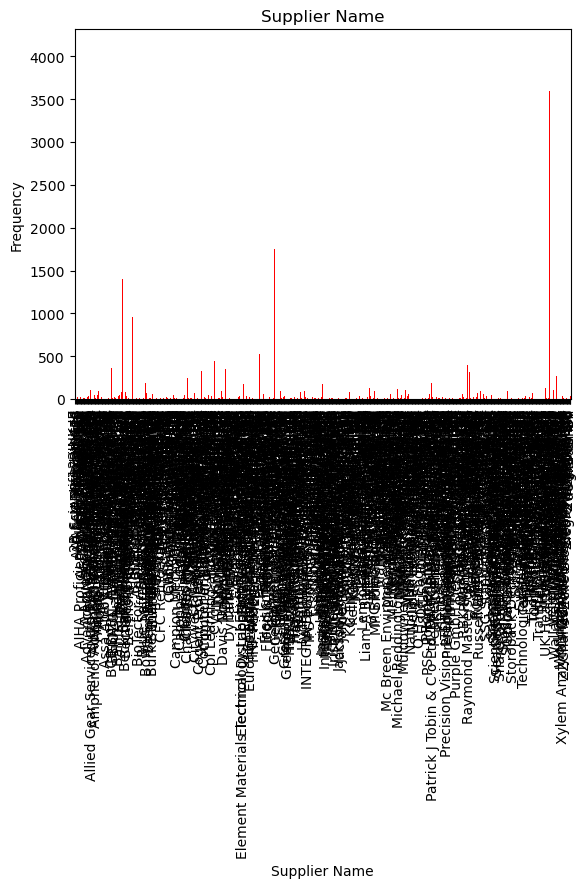

In [15]:
# plot the count volues of the categorical variable. 
grouped_Supplier_Name .plot.bar(color = 'red')
plt.title('Supplier Name')
plt.ylabel('Frequency')
plt.xlabel('Supplier Name')

## Varivale Item Type

In [17]:
df_new['Item Type'].describe()

count                  39679
unique                     4
top       NonCatalog Product
freq                   31344
Name: Item Type, dtype: object

In [18]:
df_new['Item Type'].isnull().sum()

0

In [19]:
grouped_Item_Type= df_new.groupby(['Item Type']).size()
grouped_Item_Type

Item Type
Contract NonCatalogItem     4043
NonCatalog Product         31344
PunchOut Product            3833
SQ Hosted Product            459
dtype: int64

Text(0.5, 0, 'Item Type')

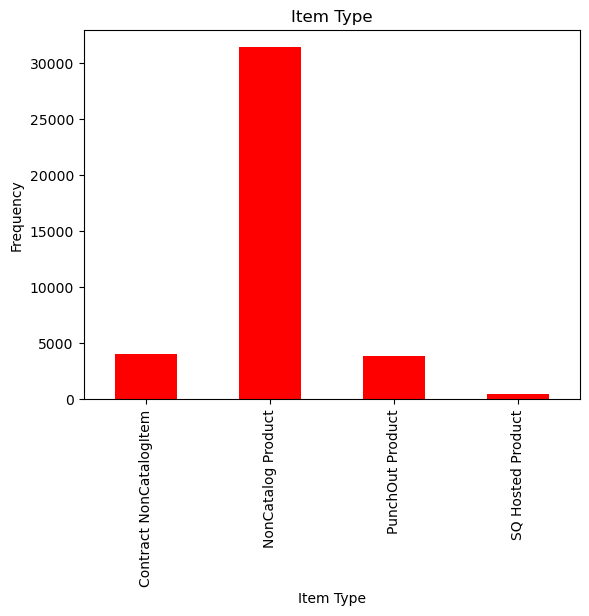

In [20]:
# plot the count volues of the categorical variable. 
grouped_Item_Type.plot.bar(color = 'red')
plt.title('Item Type')
plt.ylabel('Frequency')
plt.xlabel('Item Type')

## Variavel Product Description

In [22]:
df_new['Product Description'].describe()

count        39678
unique       20367
top       Carraige
freq           327
Name: Product Description, dtype: object

In [23]:
df_new['Product Description'].isnull().sum()

1

In [24]:
grouped_Product_Description= df_new.groupby(['Product Description']).size()
grouped_Product_Description

Product Description
"Concentration tube"                                       1
"DEC-SPORE 200 Plus                                        1
#6Q5202177975-10#CONTAINER SYSTEM SHARP  0.9L RED SMALL    1
#6Q5202185864-10#LYSYL ENDOPEPTIDASE MAS (5X20UG)          1
#NAME?                                                     3
                                                          ..
Horus Security 2023.                                     1
 Cryogenic Vials                                           1
 Dualfilter epTIPS 50-1000ul                               6
 Erlenmeyer 125ml flask                                    2
ÄNDRAT ART.NR 210072927 VIAL 8ML BRUN GLAS 144/FP          6
Length: 20367, dtype: int64

Text(0.5, 0, 'Product Description')

C:\Users\tecap\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\tecap\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\tecap\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\tecap\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\tecap\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\tecap\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 148 (\x94) m

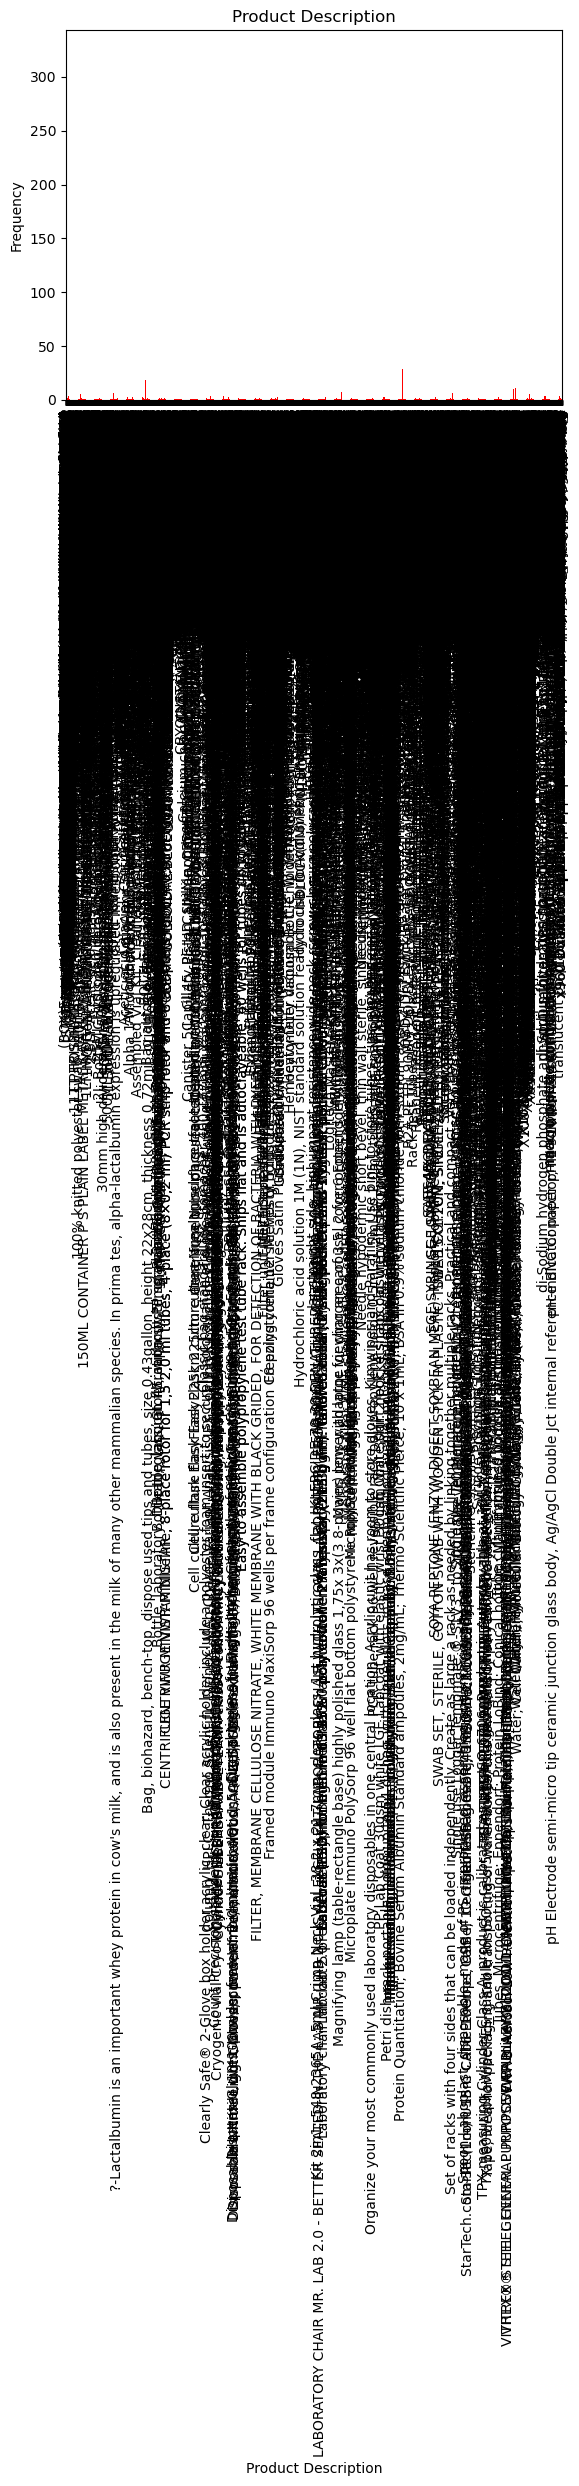

In [25]:
# plot the count volues of the categorical variable. 
grouped_Product_Description.plot.bar(color = 'red')
plt.title('Product Description')
plt.ylabel('Frequency')
plt.xlabel('Product Description')

## Variavel Currency

In [27]:
df_new['Currency'].describe()

count     39679
unique        4
top         EUR
freq      36695
Name: Currency, dtype: object

In [28]:
df_new['Currency'].isnull().sum()

0

In [29]:
grouped_Currency= df_new.groupby(['Currency']).size()
grouped_Currency

Currency
EUR    36695
GBP     2162
SEK        3
USD      819
dtype: int64

Text(0.5, 0, 'Currency')

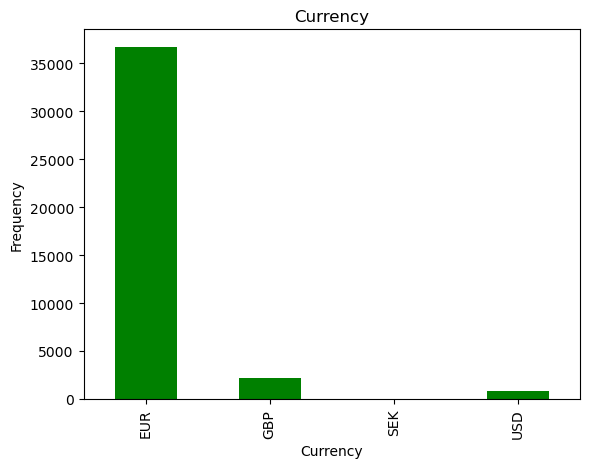

In [30]:
# plot the count volues of the categorical variable. 
grouped_Currency.plot.bar(color = 'green')
plt.title('Currency')
plt.ylabel('Frequency')
plt.xlabel('Currency')

## Buyer: First Name

In [32]:
df_new['Buyer: First Name'].describe()

count      39679
unique       157
top       Nicole
freq        3870
Name: Buyer: First Name, dtype: object

In [33]:
df_new['Buyer: First Name'].isnull().sum()

0

In [34]:
grouped_Buyer_First_Name= df_new.groupby(['Buyer: First Name']).size()
grouped_Buyer_First_Name

Buyer: First Name
Aaron      169
Aisling      1
Aislinn     10
Akshaya      7
Alban      124
          ... 
Thomas       4
Tom        286
Viviane     39
Wayne      443
Yannis       6
Length: 157, dtype: int64

## Buyer: Last Name

In [36]:
df_new['Buyer: Last Name'].describe()

count       39679
unique        179
top       Beattie
freq         3870
Name: Buyer: Last Name, dtype: object

In [37]:
df_new['Buyer: Last Name'].isnull().sum()

0

In [38]:
grouped_Buyer_Last_Name= df_new.groupby(['Buyer: Last Name']).size()
grouped_Buyer_Last_Name

Buyer: Last Name
Aboujaoudé         42
Adeniyi            39
Ahmed              67
Anguissola        146
Ansboro           859
                 ... 
Winters            75
Yeates             91
Yeramwar           11
Zamorano           73
Zielinska-Tota      2
Length: 179, dtype: int64

## Department

In [40]:
df_new['Department'].describe()

count            39518
unique              28
top       BAL-Bioassay
freq             13250
Name: Department, dtype: object

In [41]:
df_new['Department'].isnull().sum()

161

In [42]:
grouped_Department= df_new.groupby(['Department']).size()
grouped_Department

Department
BAL-Administration                 50
BAL-Analytical Services          2881
BAL-Bioassay                    13250
BAL-Calibrations                  244
BAL-Document Control             1344
BAL-Entemology                    486
BAL-Facilities                   4638
BAL-Human Resources              1395
BAL-IT                           1066
BAL-Method Development            571
BAL-Microbiology                 2778
BAL-Ops-Analytical Chemistry     1718
BAL-Ops-Bioanalysis               146
BAL-Ops-Pharmacy                  466
BAL-Project Management             10
BAL-Purchasing                   1078
BAL-Quality                      1183
BAL-RM Production                 122
BAL-Right Resourcing              852
BAL-Sales Marketing                 1
DUB-Administration               1231
DUB-Customer Service             1320
DUB-EMD Lab                       239
DUB-HR & Administration            57
DUB-Logistics                     716
DUB-Procurement                   134
D

## ShipTo Contact 1

In [44]:
df_new['ShipTo Contact 1'].describe()

count                                      39679
unique                                         8
top       Charles River Laboratories Ireland Ltd
freq                                       34069
Name: ShipTo Contact 1, dtype: object

In [45]:
df_new['ShipTo Contact 1'].isnull().sum()

0

In [46]:
grouped_ShipToContact_1= df_new.groupby(['ShipTo Contact 1']).size()
grouped_ShipToContact_1

ShipTo Contact 1
Celsis International GmbH                                 1
Charles River Biologics                                   2
Charles River Endotoxin Microbial Detection Europe        8
Charles River Laboratories Edinburgh Ltd                  1
Charles River Laboratories Endosafe                      12
Charles River Laboratories Ireland Ltd                34069
Charles River Microbial Solutions Intl Ltd             5423
Saothorlanna Bitheolaiocha                              163
dtype: int64

Text(0.5, 0, 'ShipTo Contact 1')

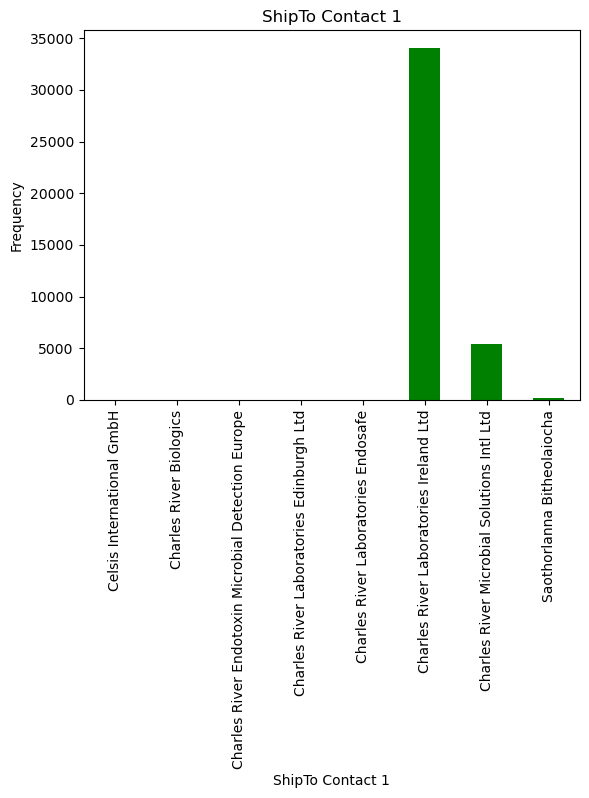

In [47]:
# plot the count volues of the categorical variable. 
grouped_ShipToContact_1.plot.bar(color = 'green')
plt.title('ShipTo Contact 1')
plt.ylabel('Frequency')
plt.xlabel('ShipTo Contact 1')

## ShipTo City

In [49]:
df_new['ShipTo City'].describe()

count       39679
unique          8
top       Ballina
freq        34069
Name: ShipTo City, dtype: object

In [50]:
df_new['ShipTo City'].isnull().sum()

0

In [51]:
grouped_ShipToCity= df_new.groupby(['ShipTo City']).size()
grouped_ShipToCity

ShipTo City
Ballina       34069
Charleston       12
Ecully            8
Glenamoy        163
Neuss             1
Rathcoole      5423
Stevenage         2
Tranent           1
dtype: int64

Text(0.5, 0, 'ShipTo City')

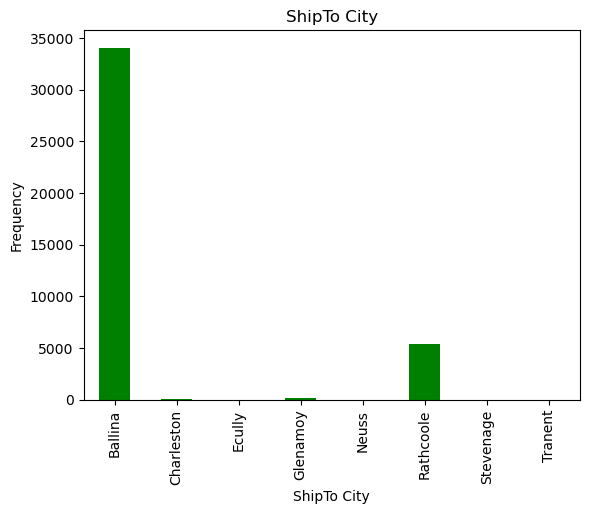

In [52]:
# plot the count volues of the categorical variable. 
grouped_ShipToCity.plot.bar(color = 'green')
plt.title('ShipTo City')
plt.ylabel('Frequency')
plt.xlabel('ShipTo City')

## ShipTo State

In [54]:
df_new['ShipTo State'].describe()

count       39679
unique          7
top       CO Mayo
freq        34232
Name: ShipTo State, dtype: object

In [55]:
df_new['ShipTo State'].isnull().sum()

0

In [56]:
grouped_ShipTo_State= df_new.groupby(['ShipTo State']).size()
grouped_ShipTo_State

ShipTo State
CO Mayo                   34232
Dublin                     5423
East Lothian                  1
Hertfordshire                 2
North Rhine-Westphalia        1
Rhone                         8
SC                           12
dtype: int64

Text(0.5, 0, 'ShipTo State')

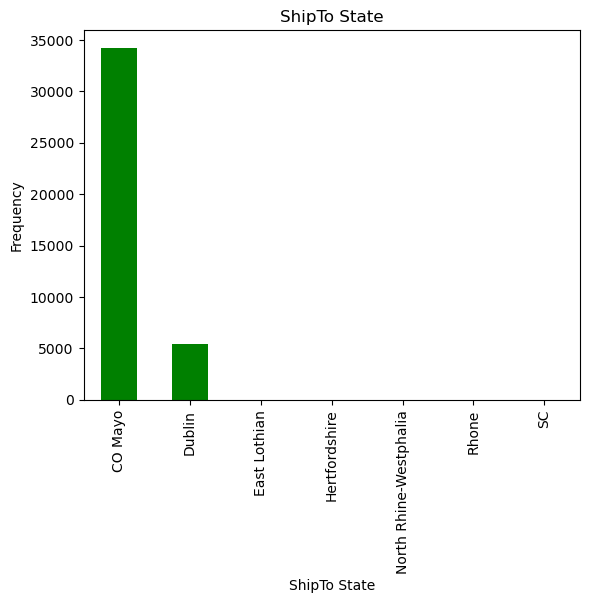

In [57]:
# plot the count volues of the categorical variable. 
grouped_ShipTo_State.plot.bar(color = 'green')
plt.title('ShipTo State')
plt.ylabel('Frequency')
plt.xlabel('ShipTo State')

## BillTo Contact 1

In [59]:
df_new['BillTo Contact 1'].describe()

count                                      39679
unique                                         6
top       Charles River Laboratories Ireland Ltd
freq                                       33454
Name: BillTo Contact 1, dtype: object

In [60]:
df_new['BillTo Contact 1'].isnull().sum()

0

In [61]:
grouped_BillTo_Contact_1= df_new.groupby(['BillTo Contact 1']).size()
grouped_BillTo_Contact_1

BillTo Contact 1
Celsis International GmbH                                  1
Charles River Laboratories Edinburgh Ltd                 418
Charles River Laboratories Ireland Ltd                 33454
Charles River Laboratories, Inc.                          12
Charles River Microbial Solutions International Ltd     5750
SBI Teo                                                   44
dtype: int64

Text(0.5, 0, 'BillTo Contact 1')

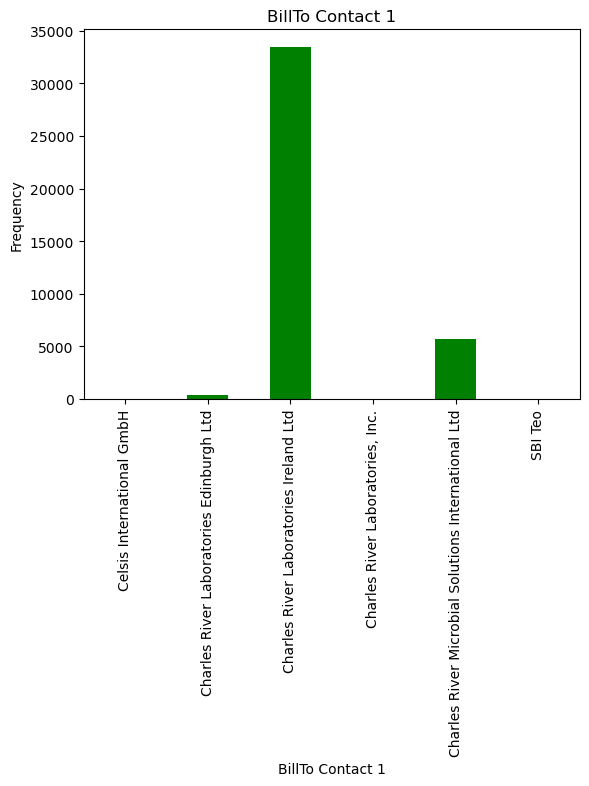

In [62]:
# plot the count volues of the categorical variable. 
grouped_BillTo_Contact_1.plot.bar(color = 'green')
plt.title('BillTo Contact 1')
plt.ylabel('Frequency')
plt.xlabel('BillTo Contact 1')

# Variavel nomericas

## Creation Date

In [65]:
# Convert 'Created Date' and 'Close Date' columns to datetime format
df_new['Creation Date'] = pd.to_datetime(df_new['Creation Date'], format='%d/%m/%Y', errors='coerce')

# Display the updated data types to confirm the changes
df_new.dtypes

PO ID                                int64
PO #                                 int64
Creation Date               datetime64[ns]
Original Revision Date              object
Last Revision Date                  object
Last Distribution Date              object
Workflow Completion Date            object
Supplier ID                          int64
Supplier Name                       object
Supplier Number                     object
PR Line ID                           int64
PO Line ID                           int64
PO Line #                            int64
Item Type                           object
Spot Buy Flag                       object
Form Type                           object
SKU/Catalog #                       object
Product Description                 object
Manufacturer                        object
Mfr Catalog #                       object
Amount/UOM & UOM                    object
Category Level 1                    object
Commodity Code                      object
Quantity   

In [66]:
df_new['Creation Date'].dtype

dtype('<M8[ns]')

In [67]:
df_new['Creation Date'].describe()

count                            39679
mean     2022-05-08 14:23:48.241639168
min                2020-01-02 00:00:00
25%                2021-03-24 00:00:00
50%                2022-03-10 00:00:00
75%                2023-07-05 00:00:00
max                2024-12-31 00:00:00
Name: Creation Date, dtype: object

In [68]:
# explore categorical data from (AREARES)
grouped_Creation_Date = df_new.groupby(['Creation Date']).size()
grouped_Creation_Date

Creation Date
2020-01-02     8
2020-01-03     4
2020-01-06    68
2020-01-07    99
2020-01-08    40
              ..
2024-12-18    53
2024-12-19    14
2024-12-20    19
2024-12-23    21
2024-12-31     1
Length: 1258, dtype: int64

<Axes: xlabel='Creation Date'>

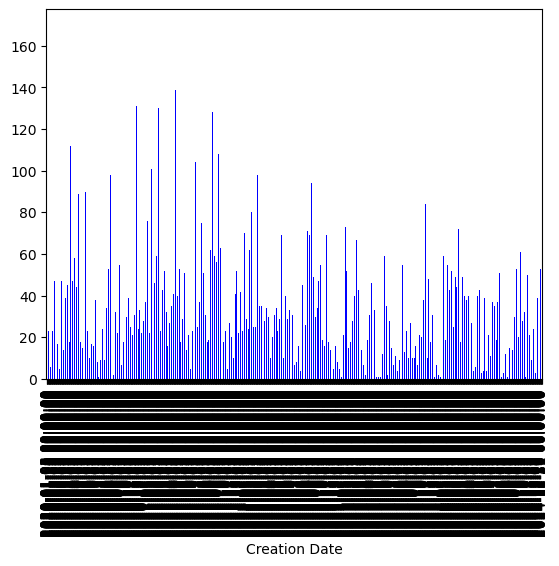

In [69]:
grouped_Creation_Date.plot.bar(color = 'blue')

Text(0.5, 1.0, 'Cration Date')

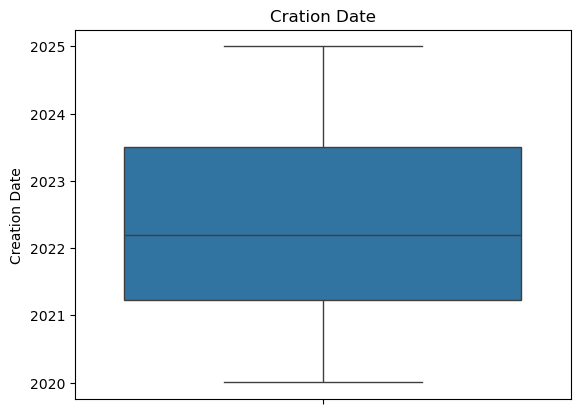

In [70]:
sns.boxplot(df_new['Creation Date']).set_title('Cration Date')

In [71]:
df_new['Creation Date'].isnull().sum()

0

Text(0.5, 1.0, 'Creation Date')

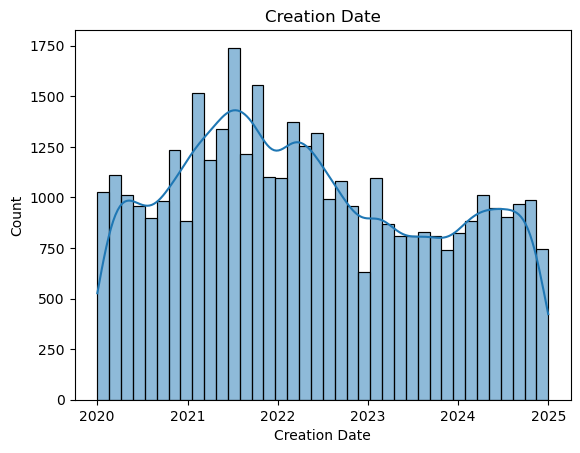

In [72]:
sns.histplot(df_new['Creation Date'], kde=True).set_title('Creation Date')

## Quantity

In [74]:
df_new['Quantity'].dtype

dtype('float64')

In [75]:
df_new['Quantity'].describe()

count     39679.000000
mean        200.601837
std        2617.021139
min           0.250000
25%           1.000000
50%           2.000000
75%           6.000000
max      269827.000000
Name: Quantity, dtype: float64

In [76]:
grouped_Quantity = df_new.groupby(['Quantity']).size()
grouped_Quantity

Quantity
0.25             3
1.00         17132
2.00          5859
2.50             4
2.70             1
             ...  
72240.00         1
150000.00        1
162000.00        1
175075.00        1
269827.00        1
Length: 856, dtype: int64

Text(0.5, 1.0, 'Quantity')

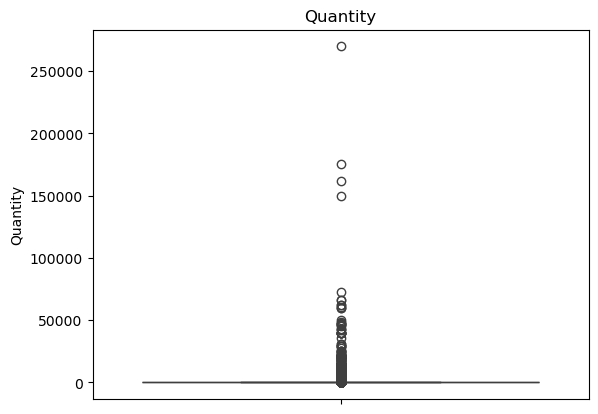

In [77]:
sns.boxplot(df_new['Quantity']).set_title('Quantity')

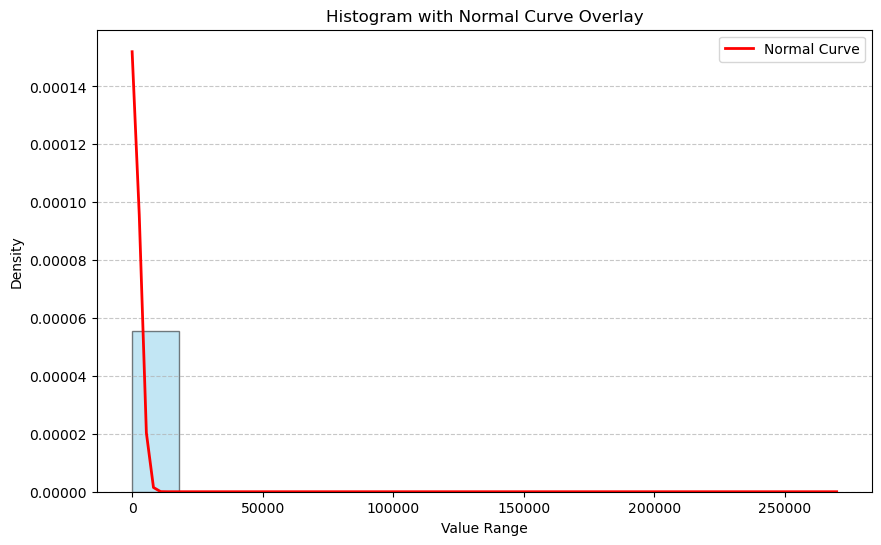

In [78]:
from scipy import stats

## Note from CE: The second step is visualise how the data is distributed using a histogram
# Create histogram
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(df_new['Quantity'], bins=15, density=True, color='skyblue', edgecolor='black', alpha=0.5)

# calculating the  normal distribution parameters 
mu, std = stats.norm.fit(df_new['Quantity'])

# Create a range of x values for the normal curve
x = np.linspace(min(df_new['Quantity']), max(df_new['Quantity']), 100)

# Create the normal distribution curve
p = stats.norm.pdf(x, mu, std)

# Plot the normal curve
plt.plot(x, p, 'r-', linewidth=2, label='Normal Curve')
plt.xlabel('Value Range')
plt.ylabel('Density')
plt.title('Histogram with Normal Curve Overlay')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

<Axes: xlabel='Quantity'>

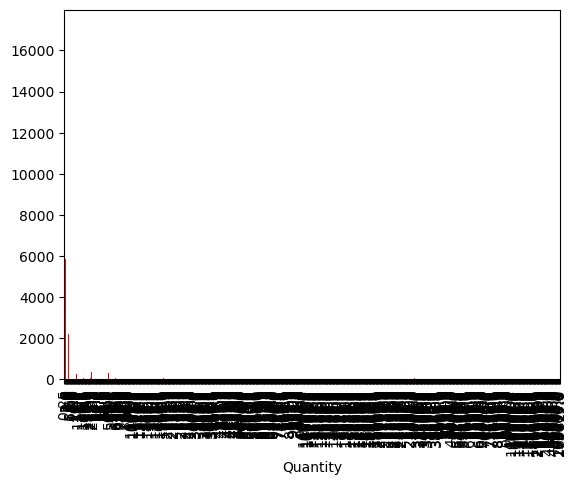

In [79]:
grouped_Quantity.plot.bar(color = 'red')

In [80]:
df_new['Quantity'].isnull().sum()

0

## Unit Price

In [82]:
# df_new['Unit Price'] = pd.to_numeric(df_new['Unit Price'], errors='coerce')

In [83]:
df_new['Unit Price'].dtype

dtype('float64')

In [84]:
df_new['Unit Price'].describe()

count     39679.000000
mean        449.371612
std        2380.355070
min           0.000000
25%           8.365000
50%          51.270000
75%         207.700000
max      187810.000000
Name: Unit Price, dtype: float64

In [85]:
grouped_Unit_Price = df_new.groupby(['Unit Price']).size()
grouped_Unit_Price

Unit Price
0.00         4114
0.01           53
0.02            2
0.06            1
0.12            1
             ... 
79857.00        1
84515.00        1
108895.00       1
178294.16       1
187810.00       1
Length: 9367, dtype: int64

Text(0.5, 1.0, 'Unit Price')

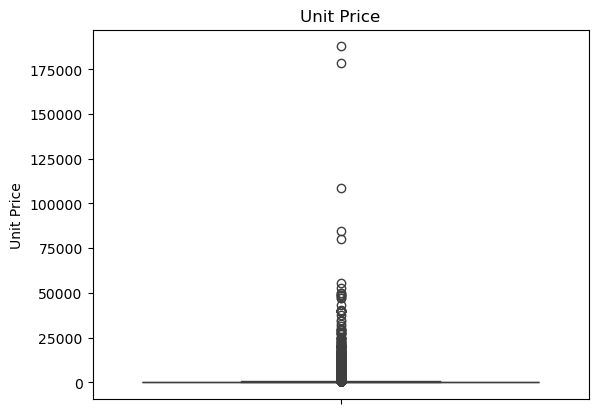

In [86]:
sns.boxplot(df_new['Unit Price']).set_title('Unit Price')

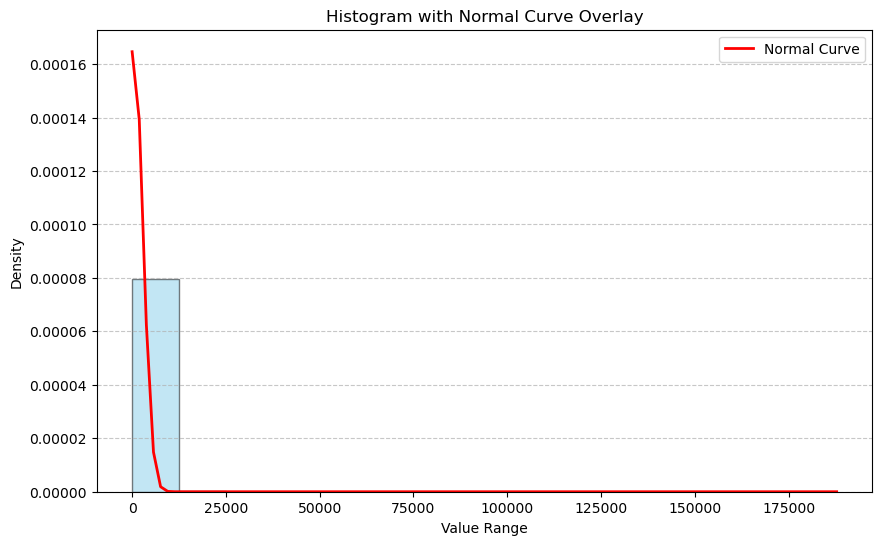

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Ensure 'Unit Price' column is numeric
df_new['Unit Price'] = pd.to_numeric(df_new['Unit Price'], errors='coerce')

# Drop NaN values (if any exist)
# df_new = df_new.dropna(subset=['Unit Price'])

# Now, retry the fitting
mu, std = stats.norm.fit(df['Unit Price'])

# Create histogram
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(df_new['Unit Price'], bins=15, density=True, color='skyblue', edgecolor='black', alpha=0.5)

# Create a range of x values for the normal curve
x = np.linspace(min(df_new['Unit Price']), max(df_new['Unit Price']), 100)

# Create the normal distribution curve
p = stats.norm.pdf(x, mu, std)

# Plot the normal curve
plt.plot(x, p, 'r-', linewidth=2, label='Normal Curve')
plt.xlabel('Value Range')
plt.ylabel('Density')
plt.title('Histogram with Normal Curve Overlay')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


In [88]:
df_new['Unit Price'].isnull().sum()

0

In [89]:
df_new['Unit Price'].value_counts(dropna=False)

Unit Price
0.00       4114
1.00       2292
10.00       463
325.00      381
5.00        336
           ... 
46.68         1
10.15         1
13.64         1
82.79         1
3528.00       1
Name: count, Length: 9367, dtype: int64

## Extended Price

In [91]:
# df_new['Extended Price'] = pd.to_numeric(df_new['Extended Price'], errors='coerce')

In [92]:
df_new['Extended Price'].dtype

dtype('float64')

In [93]:
df_new['Extended Price'].describe()

count     39679.000000
mean        915.893646
std        3787.904447
min           0.000000
25%          44.500000
50%         176.600000
75%         591.300000
max      269827.000000
Name: Extended Price, dtype: float64

In [94]:
df_new['Extended Price'].isnull().sum()

0

In [95]:
grouped_Extended_Price = df_new.groupby(['Extended Price']).size()
grouped_Extended_Price

Extended Price
0.00         4114
0.01           27
0.02           10
0.03            3
0.04            2
             ... 
162000.00       1
175075.00       1
178294.16       1
187810.00       1
269827.00       1
Length: 12412, dtype: int64

Text(0.5, 1.0, 'Extended Price')

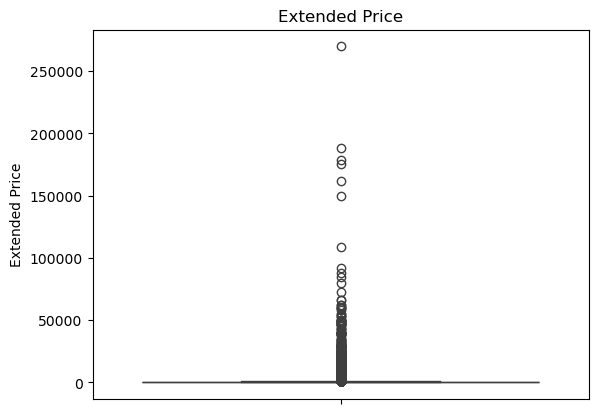

In [96]:
sns.boxplot(df_new['Extended Price']).set_title('Extended Price')

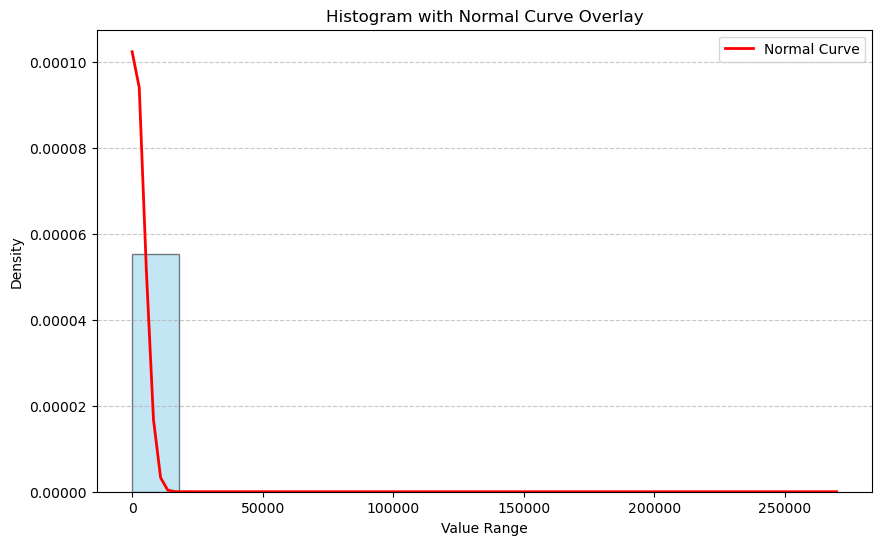

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Ensure 'Unit Price' column is numeric
df_new['Extended Price'] = pd.to_numeric(df_new['Extended Price'], errors='coerce')

# Drop NaN values (if any exist)
# df_new = df_new.dropna(subset=['Extended Price'])

# Now, retry the fitting
mu, std = stats.norm.fit(df['Extended Price'])

# Create histogram
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(df_new['Extended Price'], bins=15, density=True, color='skyblue', edgecolor='black', alpha=0.5)

# Create a range of x values for the normal curve
x = np.linspace(min(df_new['Extended Price']), max(df_new['Extended Price']), 100)

# Create the normal distribution curve
p = stats.norm.pdf(x, mu, std)

# Plot the normal curve
plt.plot(x, p, 'r-', linewidth=2, label='Normal Curve')
plt.xlabel('Value Range')
plt.ylabel('Density')
plt.title('Histogram with Normal Curve Overlay')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

## Cost Variance

In [99]:
df_new['Cost Variance'].dtype

dtype('float64')

In [100]:
df_new['Cost Variance'].describe()

count     39679.000000
mean        915.893646
std        3787.904447
min           0.000000
25%          44.500000
50%         176.600000
75%         591.300000
max      269827.000000
Name: Cost Variance, dtype: float64

In [101]:
df_new['Cost Variance'].isnull().sum()

0

In [102]:
grouped_Cost_Variance = df_new.groupby(['Cost Variance']).size()
grouped_Cost_Variance

Cost Variance
0.00         4114
0.01           27
0.02           10
0.03            3
0.04            2
             ... 
162000.00       1
175075.00       1
178294.16       1
187810.00       1
269827.00       1
Length: 12412, dtype: int64

Text(0.5, 1.0, 'Cost Variance')

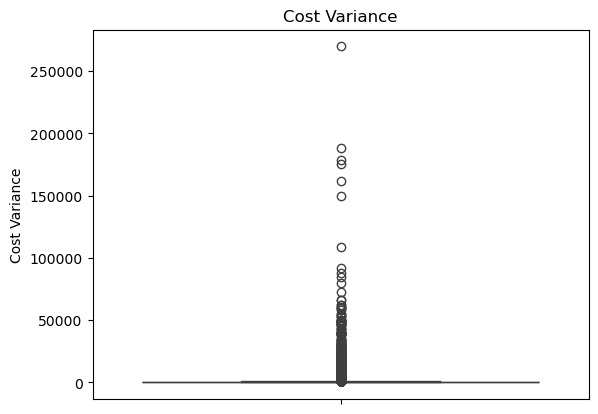

In [103]:
sns.boxplot(df_new['Cost Variance']).set_title('Cost Variance')

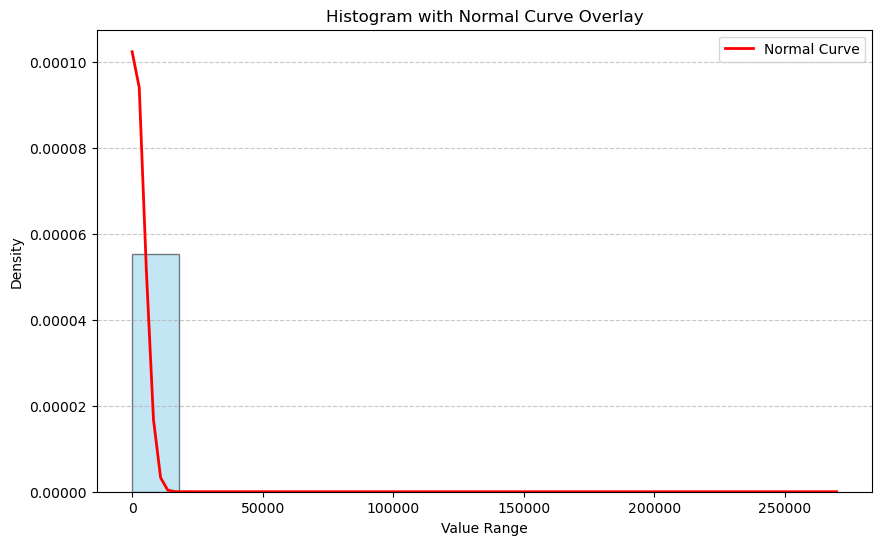

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Ensure 'Unit Price' column is numeric
df_new['Cost Variance'] = pd.to_numeric(df_new['Cost Variance'], errors='coerce')

# Drop NaN values (if any exist)
# df_new = df_new.dropna(subset=['Extended Price'])

# Now, retry the fitting
mu, std = stats.norm.fit(df['Cost Variance'])

# Create histogram
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(df_new['Cost Variance'], bins=15, density=True, color='skyblue', edgecolor='black', alpha=0.5)

# Create a range of x values for the normal curve
x = np.linspace(min(df_new['Cost Variance']), max(df_new['Cost Variance']), 100)

# Create the normal distribution curve
p = stats.norm.pdf(x, mu, std)

# Plot the normal curve
plt.plot(x, p, 'r-', linewidth=2, label='Normal Curve')
plt.xlabel('Value Range')
plt.ylabel('Density')
plt.title('Histogram with Normal Curve Overlay')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Data cleaning

In [106]:
df_new.head()

PO ID        PO # Creation Date Original Revision Date  \
0  165173527  6601508951    2024-12-31             31/12/2024   
1  165108603  6601507866    2024-12-23             23/12/2024   
2  165108508  6601507863    2024-12-23             23/12/2024   
3  165108508  6601507863    2024-12-23             23/12/2024   
4  165108508  6601507863    2024-12-23             23/12/2024   

  Last Revision Date Last Distribution Date Workflow Completion Date  \
0         31/12/2024                    NaN               31/12/2024   
1         23/12/2024             23/12/2024               23/12/2024   
2         23/12/2024             23/12/2024               23/12/2024   
3         23/12/2024             23/12/2024               23/12/2024   
4         23/12/2024             23/12/2024               23/12/2024   

   Supplier ID                   Supplier Name Supplier Number  ...  \
0   1002328932  Arena Hospitality t/a Bel Cibo         1028698  ...   
1     14355761      Molecular Devices (UK) Ltd         1008750  ...   
2     16031282  Horus Security Consultancy Ltd         1015083  ...   
3     16031282  Horus Security Consultancy Ltd         1015083  ...   
4     16031282  Horus Security Consultancy Ltd         1015083  ...   

   Buyer: Last Name            Buyer: Email               Department  \
0             Byrne     Sarah.Byrne@crl.com  DUB-HR & Administration   
1          Monaghan  Brian.Monaghan@crl.com                   BAL-IT   
2           McNulty   Karen.McNulty@crl.com      BAL-Human Resources   
3           McNulty   Karen.McNulty@crl.com      BAL-Human Resources   
4           McNulty   Karen.McNulty@crl.com      BAL-Human Resources   

                             ShipTo Contact 1 ShipTo City ShipTo State  \
0  Charles River Microbial Solutions Intl Ltd   Rathcoole       Dublin   
1      Charles River Laboratories Ireland Ltd     Ballina      CO Mayo   
2      Charles River Laboratories Ireland Ltd     Ballina      CO Mayo   
3      Charles River Laboratories Ireland Ltd     Ballina      CO Mayo   
4      Charles River Laboratories Ireland Ltd     Ballina      CO Mayo   

  ShipTo Postal Code                                   BillTo Contact 1  \
0            D24NF21  Charles River Microbial Solutions Internationa...   
1           F26 D786             Charles River Laboratories Ireland Ltd   
2           F26 D786             Charles River Laboratories Ireland Ltd   
3           F26 D786             Charles River Laboratories Ireland Ltd   
4           F26 D786             Charles River Laboratories Ireland Ltd   

  Cost Variance Receive Status  
0        4000.0           none  
1        4535.0           none  
2         308.0           none  
3         154.0           none  
4         154.0           none  

[5 rows x 39 columns]

In [107]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39679 entries, 0 to 39678
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   PO ID                     39679 non-null  int64         
 1   PO #                      39679 non-null  int64         
 2   Creation Date             39679 non-null  datetime64[ns]
 3   Original Revision Date    39663 non-null  object        
 4   Last Revision Date        39663 non-null  object        
 5   Last Distribution Date    29188 non-null  object        
 6   Workflow Completion Date  39679 non-null  object        
 7   Supplier ID               39679 non-null  int64         
 8   Supplier Name             39679 non-null  object        
 9   Supplier Number           39679 non-null  object        
 10  PR Line ID                39679 non-null  int64         
 11  PO Line ID                39679 non-null  int64         
 12  PO Line #         

In [108]:
df_new_2 = df_new.copy()

In [109]:
# drop columns 
df_new_2 = df_new_2.drop(['PO #', 'Original Revision Date'], axis=1)

In [110]:
df_new_2 = df_new_2.drop(['Last Revision Date', 'Last Distribution Date'], axis=1)

In [111]:
df_new_2 = df_new_2.drop(['Workflow Completion Date', 'Supplier Number'], axis=1)

In [112]:
df_new_2 = df_new_2.drop(['Buyer:  username', 'Buyer: Email'], axis=1)

In [113]:
df_new_2 = df_new_2.drop(['ShipTo Postal Code', 'Receive Status'], axis=1)

In [114]:
df_new_2 = df_new_2.drop(['PR Line ID', 'PO Line ID'], axis=1)

In [115]:
df_new_2 = df_new_2.drop(['Spot Buy Flag', 'Form Type'], axis=1)

In [116]:
df_new_2 = df_new_2.drop(['PO Line #', 'SKU/Catalog #'], axis=1)

In [117]:
df_new_2 = df_new_2.drop(['Manufacturer', 'Mfr Catalog #'], axis=1)

In [118]:
df_new_2 = df_new_2.drop(['Amount/UOM & UOM', 'Category Level 1'], axis=1)

In [119]:
df_new_2 = df_new_2.drop(['Commodity Code'], axis=1)

In [120]:
df_new_2.head()

PO ID Creation Date  Supplier ID                   Supplier Name  \
0  165173527    2024-12-31   1002328932  Arena Hospitality t/a Bel Cibo   
1  165108603    2024-12-23     14355761      Molecular Devices (UK) Ltd   
2  165108508    2024-12-23     16031282  Horus Security Consultancy Ltd   
3  165108508    2024-12-23     16031282  Horus Security Consultancy Ltd   
4  165108508    2024-12-23     16031282  Horus Security Consultancy Ltd   

            Item Type Product Description  Quantity  Unit Price  \
0  NonCatalog Product             2025 PO       1.0      4000.0   
1  NonCatalog Product            SMP Care       1.0      4535.0   
2  NonCatalog Product             Quality       2.0       154.0   
3  NonCatalog Product          Analytical       1.0       154.0   
4  NonCatalog Product               Micro       1.0       154.0   

   Extended Price Currency Buyer: First Name Buyer: Last Name  \
0          4000.0      EUR             Sarah            Byrne   
1          4535.0      USD             Brian         Monaghan   
2           308.0      GBP             Karen          McNulty   
3           154.0      GBP             Karen          McNulty   
4           154.0      GBP             Karen          McNulty   

                Department                            ShipTo Contact 1  \
0  DUB-HR & Administration  Charles River Microbial Solutions Intl Ltd   
1                   BAL-IT      Charles River Laboratories Ireland Ltd   
2      BAL-Human Resources      Charles River Laboratories Ireland Ltd   
3      BAL-Human Resources      Charles River Laboratories Ireland Ltd   
4      BAL-Human Resources      Charles River Laboratories Ireland Ltd   

  ShipTo City ShipTo State                                   BillTo Contact 1  \
0   Rathcoole       Dublin  Charles River Microbial Solutions Internationa...   
1     Ballina      CO Mayo             Charles River Laboratories Ireland Ltd   
2     Ballina      CO Mayo             Charles River Laboratories Ireland Ltd   
3     Ballina      CO Mayo             Charles River Laboratories Ireland Ltd   
4     Ballina      CO Mayo             Charles River Laboratories Ireland Ltd   

   Cost Variance  
0         4000.0  
1         4535.0  
2          308.0  
3          154.0  
4          154.0

# EDA

In [225]:
df_new_2.to_csv("df_new_3.csv", index=False)

In [229]:
df3 = pd.read_csv('df_new_3.csv')

In [231]:
df3.head()

PO ID Creation Date  Supplier ID                   Supplier Name  \
0  165173527    2024-12-31   1002328932  Arena Hospitality t/a Bel Cibo   
1  165108603    2024-12-23     14355761      Molecular Devices (UK) Ltd   
2  165108508    2024-12-23     16031282  Horus Security Consultancy Ltd   
3  165108508    2024-12-23     16031282  Horus Security Consultancy Ltd   
4  165108508    2024-12-23     16031282  Horus Security Consultancy Ltd   

            Item Type Product Description  Quantity  Unit Price  \
0  NonCatalog Product             2025 PO       1.0      4000.0   
1  NonCatalog Product            SMP Care       1.0      4535.0   
2  NonCatalog Product             Quality       2.0       154.0   
3  NonCatalog Product          Analytical       1.0       154.0   
4  NonCatalog Product               Micro       1.0       154.0   

   Extended Price Currency Buyer: First Name Buyer: Last Name  \
0          4000.0      EUR             Sarah            Byrne   
1          4535.0      USD             Brian         Monaghan   
2           308.0      GBP             Karen          McNulty   
3           154.0      GBP             Karen          McNulty   
4           154.0      GBP             Karen          McNulty   

                Department                            ShipTo Contact 1  \
0  DUB-HR & Administration  Charles River Microbial Solutions Intl Ltd   
1                   BAL-IT      Charles River Laboratories Ireland Ltd   
2      BAL-Human Resources      Charles River Laboratories Ireland Ltd   
3      BAL-Human Resources      Charles River Laboratories Ireland Ltd   
4      BAL-Human Resources      Charles River Laboratories Ireland Ltd   

  ShipTo City ShipTo State                                   BillTo Contact 1  \
0   Rathcoole       Dublin  Charles River Microbial Solutions Internationa...   
1     Ballina      CO Mayo             Charles River Laboratories Ireland Ltd   
2     Ballina      CO Mayo             Charles River Laboratories Ireland Ltd   
3     Ballina      CO Mayo             Charles River Laboratories Ireland Ltd   
4     Ballina      CO Mayo             Charles River Laboratories Ireland Ltd   

   Cost Variance  
0         4000.0  
1         4535.0  
2          308.0  
3          154.0  
4          154.0

In [233]:
quanty_per_Year = df3.groupby('Creation Date')['Quantity'].sum()
quanty_per_Year

Creation Date
2020-01-02     2752.00
2020-01-03       12.00
2020-01-06      325.00
2020-01-07    66890.50
2020-01-08      186.00
                ...   
2024-12-18    19712.31
2024-12-19    27460.00
2024-12-20       73.00
2024-12-23    42721.88
2024-12-31        1.00
Name: Quantity, Length: 1258, dtype: float64

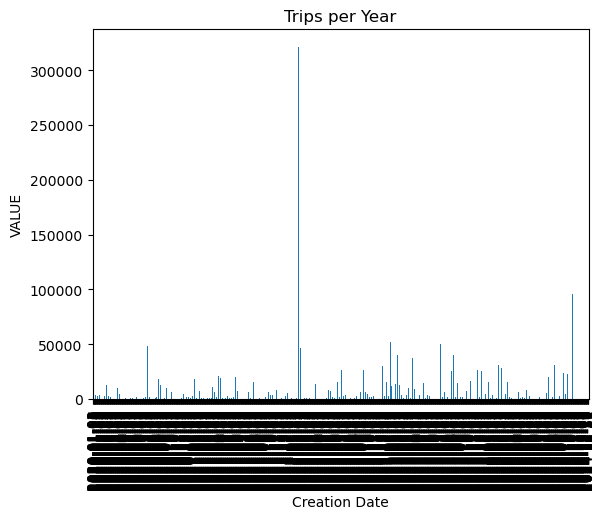

In [235]:

quanty_per_Year = df3.groupby('Creation Date')['Quantity'].sum().plot(kind='bar', title='Trips per Year')
plt.ylabel("VALUE")
plt.grid(False)
plt.show()

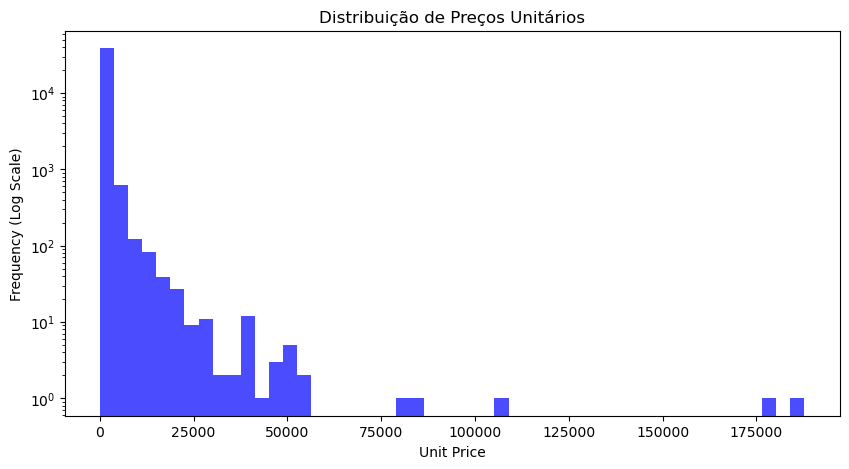

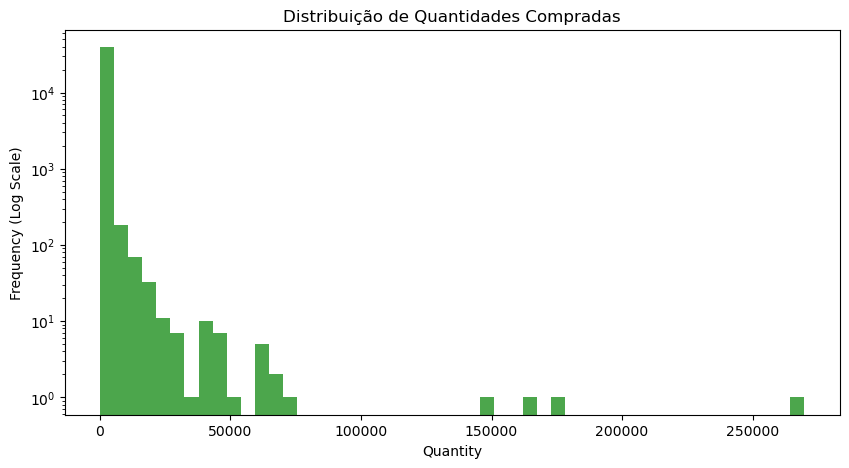

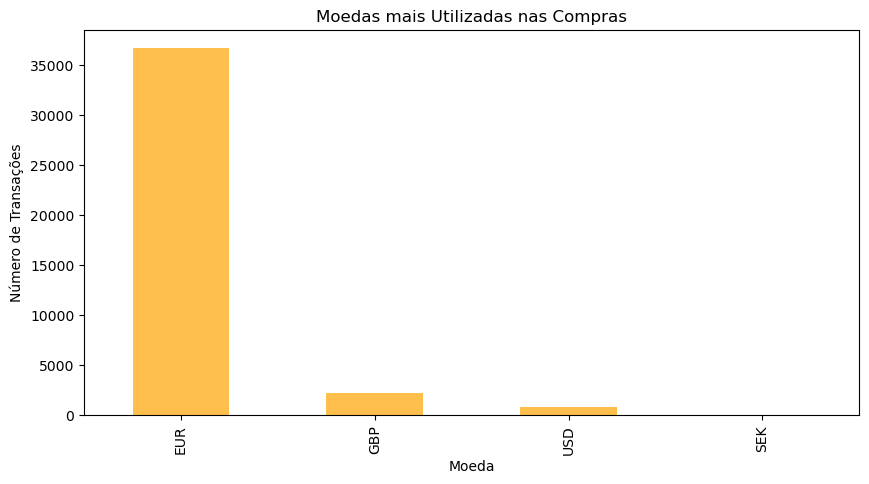

In [240]:
import matplotlib.pyplot as plt

# Gráfico de distribuição de preços unitários (log scale para melhor visualização)
plt.figure(figsize=(10, 5))
plt.hist(df3["Unit Price"], bins=50, color='blue', alpha=0.7, log=True)
plt.xlabel("Unit Price")
plt.ylabel("Frequency (Log Scale)")
plt.title("Distribuição de Preços Unitários")
plt.show()

# Gráfico de distribuição de quantidades compradas (log scale)
plt.figure(figsize=(10, 5))
plt.hist(df3["Quantity"], bins=50, color='green', alpha=0.7, log=True)
plt.xlabel("Quantity")
plt.ylabel("Frequency (Log Scale)")
plt.title("Distribuição de Quantidades Compradas")
plt.show()

# Gráfico de barras das moedas mais utilizadas nas compras
plt.figure(figsize=(10, 5))
df["Currency"].value_counts().plot(kind="bar", color='orange', alpha=0.7)
plt.xlabel("Moeda")
plt.ylabel("Número de Transações")
plt.title("Moedas mais Utilizadas nas Compras")
plt.show()

# Exibir os gráficos para o usuário
plt.show()


## Visualizar a Distribuição de Variáveis Numéricas

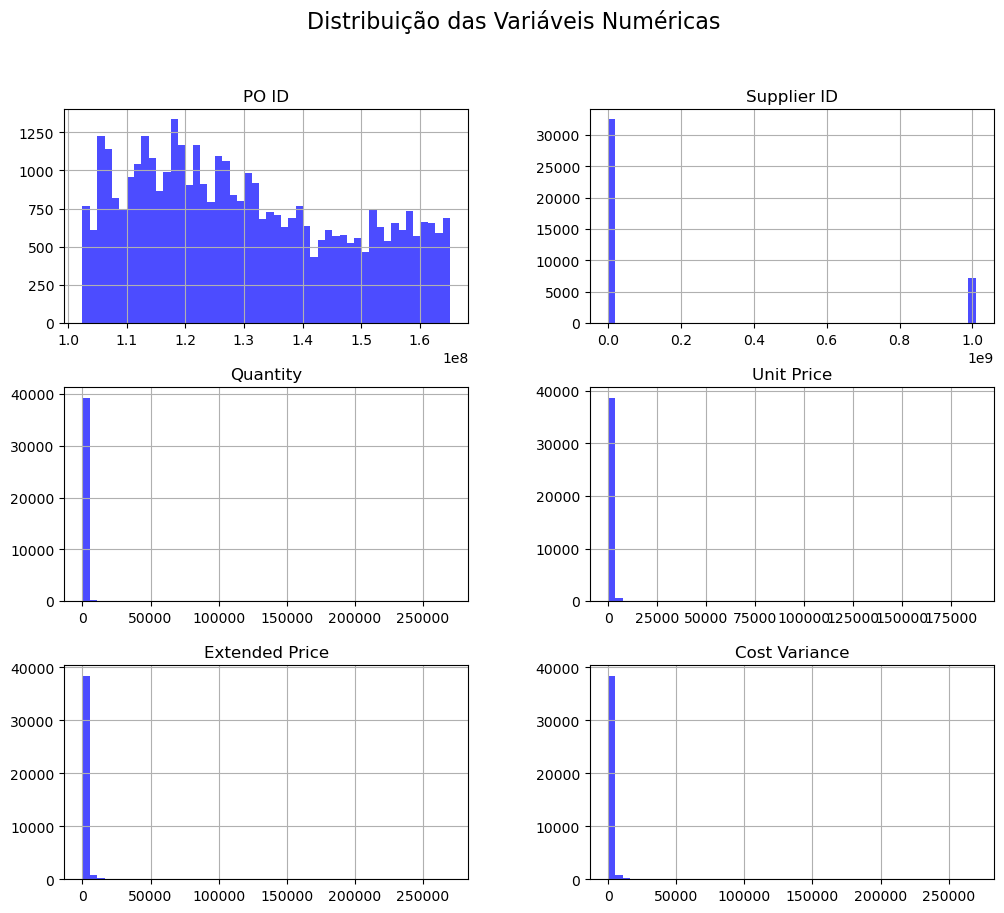

In [242]:
# Plotar histogramas das variáveis numéricas
df3.hist(figsize=(12, 10), bins=50, color='blue', alpha=0.7)
plt.suptitle("Distribuição das Variáveis Numéricas", fontsize=16)
plt.show()


##  Identificar Outliers com Boxplots

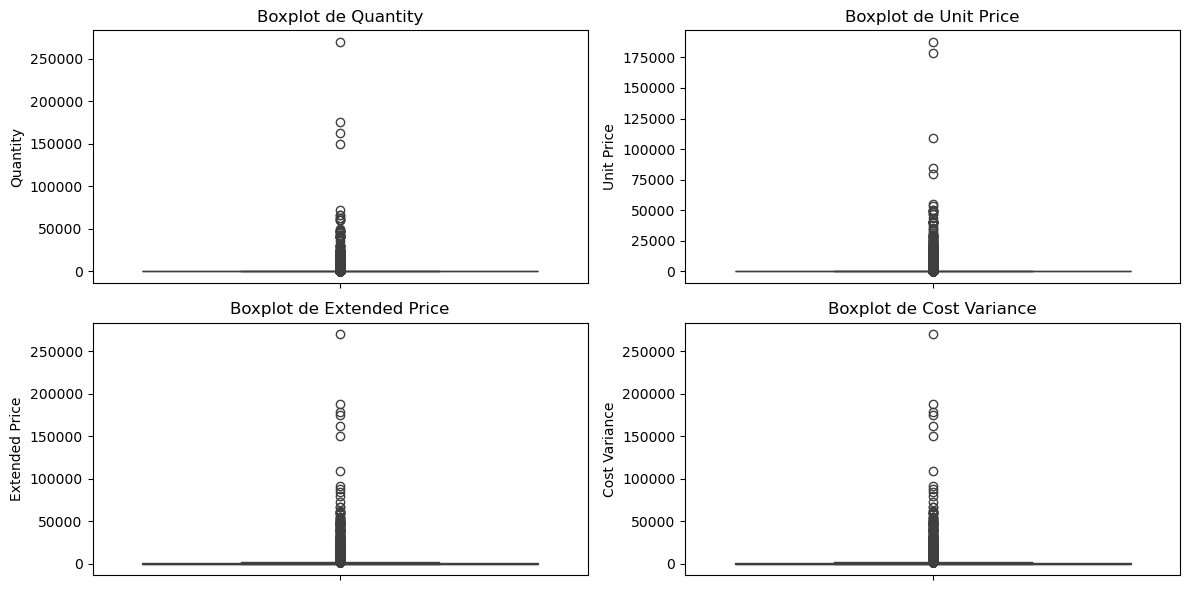

In [245]:
# Definir colunas numéricas
numerical_cols = ["Quantity", "Unit Price", "Extended Price", "Cost Variance"]

# Criar boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()


##  Analisar a Correlação Entre Variáveis

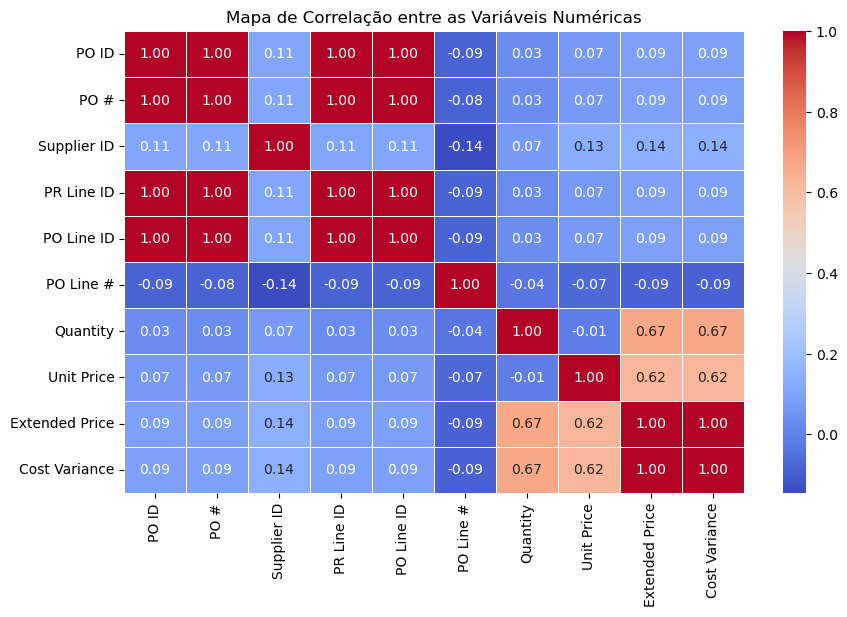

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas colunas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Criar matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlação entre as Variáveis Numéricas")
plt.show()



## Analisar os Principais Fornecedores

C:\Users\tecap\AppData\Local\Temp\ipykernel_40892\550107269.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_suppliers.values, y=top_suppliers.index, palette="viridis")


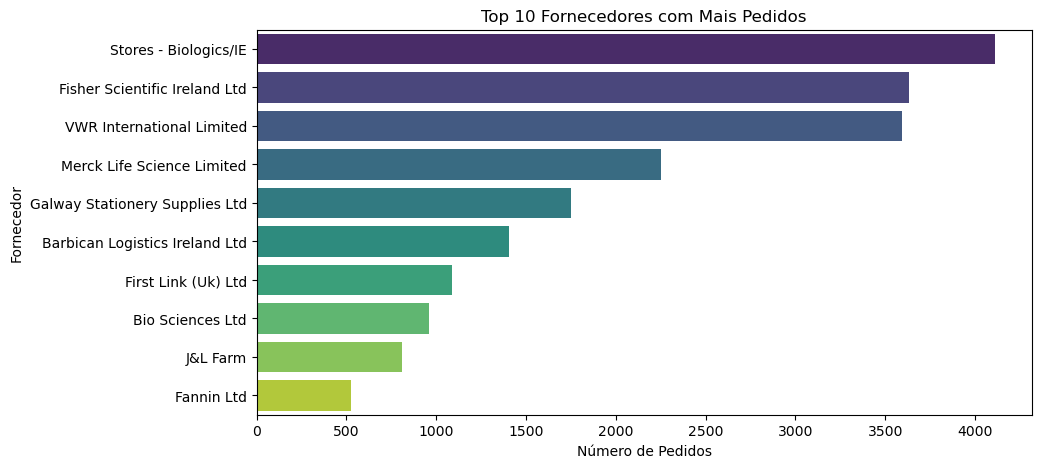

In [253]:
# Top 10 fornecedores por número de transações
top_suppliers = df3["Supplier Name"].value_counts().head(10)

# Criar gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=top_suppliers.values, y=top_suppliers.index, palette="viridis")
plt.xlabel("Número de Pedidos")
plt.ylabel("Fornecedor")
plt.title("Top 10 Fornecedores com Mais Pedidos")
plt.show()


## Moedas Mais Usadas nas Compras

C:\Users\tecap\AppData\Local\Temp\ipykernel_40892\3006586944.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df3["Currency"], order=df3["Currency"].value_counts().index, palette="magma")


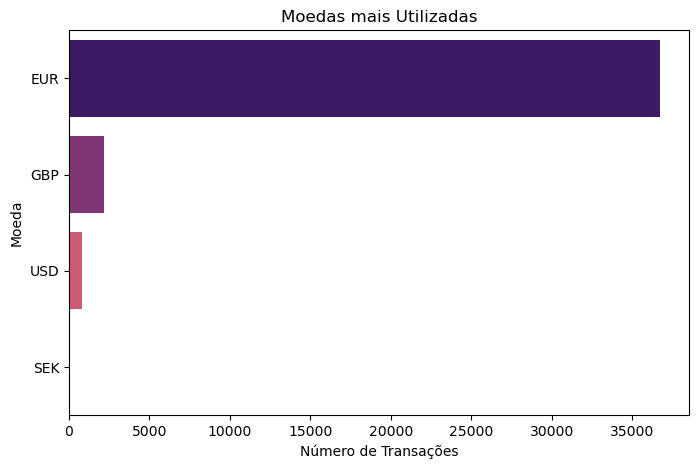

In [259]:
# Contagem de moedas mais usadas
plt.figure(figsize=(8, 5))
sns.countplot(y=df3["Currency"], order=df3["Currency"].value_counts().index, palette="magma")
plt.xlabel("Número de Transações")
plt.ylabel("Moeda")
plt.title("Moedas mais Utilizadas")
plt.show()


## Evolução das Compras ao Longo do Tempo

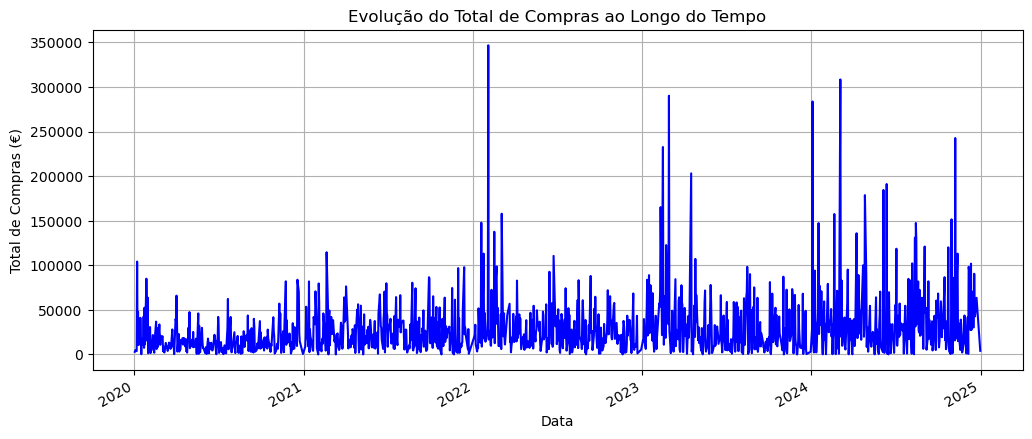

In [261]:
# Converter a coluna de datas para o formato datetime
df3["Creation Date"] = pd.to_datetime(df3["Creation Date"])

# Agrupar por data e somar o valor total das compras
daily_purchases = df3.groupby("Creation Date")["Extended Price"].sum()

# Criar gráfico de tendência
plt.figure(figsize=(12, 5))
daily_purchases.plot(color="blue")
plt.xlabel("Data")
plt.ylabel("Total de Compras (€)")
plt.title("Evolução do Total de Compras ao Longo do Tempo")
plt.grid()
plt.show()


## Compradores que Mais Realizaram Pedidos

C:\Users\tecap\AppData\Local\Temp\ipykernel_40892\800163520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_buyers.index, x=top_buyers.values, palette="coolwarm")


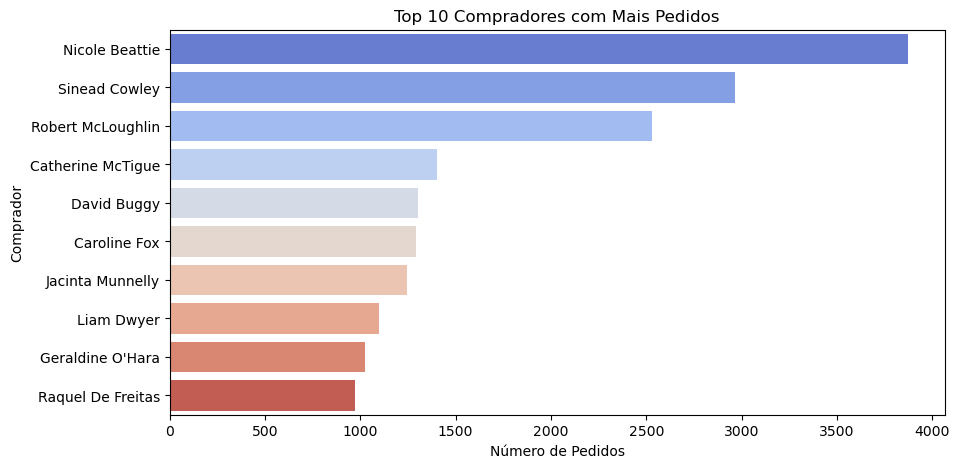

In [264]:
# Criar coluna com nome completo do comprador
df3["Buyer"] = df3["Buyer: First Name"] + " " + df["Buyer: Last Name"]

# Top 10 compradores
top_buyers = df3["Buyer"].value_counts().head(10)

# Gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(y=top_buyers.index, x=top_buyers.values, palette="coolwarm")
plt.xlabel("Número de Pedidos")
plt.ylabel("Comprador")
plt.title("Top 10 Compradores com Mais Pedidos")
plt.show()


## Evolução do Total de Compras ao Longo do Tempo

C:\Users\tecap\AppData\Local\Temp\ipykernel_40892\672704046.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df3["Creation Date"] = pd.to_datetime(df["Creation Date"])


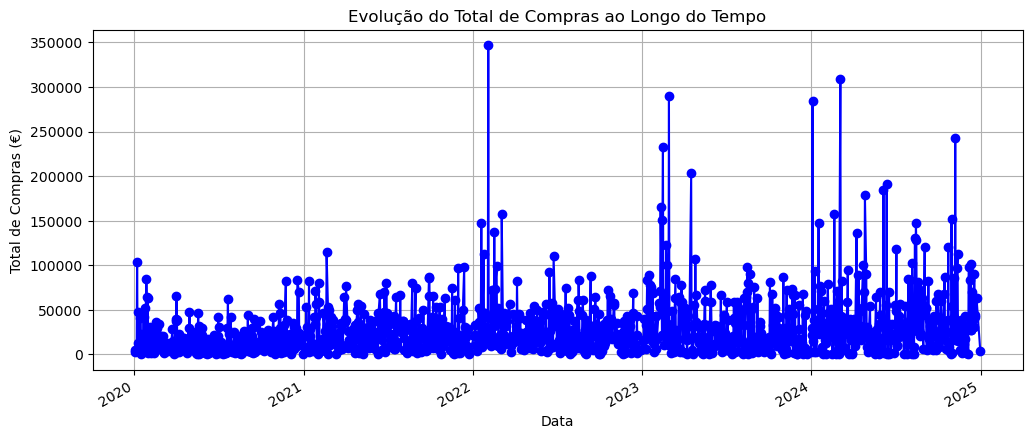

In [267]:
# Converter 'Creation Date' para datetime
df3["Creation Date"] = pd.to_datetime(df["Creation Date"])

# Agregar compras por data
df_trend = df3.groupby("Creation Date")["Extended Price"].sum()

# Plotar a evolução do total de compras
plt.figure(figsize=(12, 5))
df_trend.plot(color="blue", marker="o", linestyle="-")
plt.xlabel("Data")
plt.ylabel("Total de Compras (€)")
plt.title("Evolução do Total de Compras ao Longo do Tempo")
plt.grid()
plt.show()


## Principais Fornecedores ao Longo do Tempo

<Figure size 1500x800 with 0 Axes>

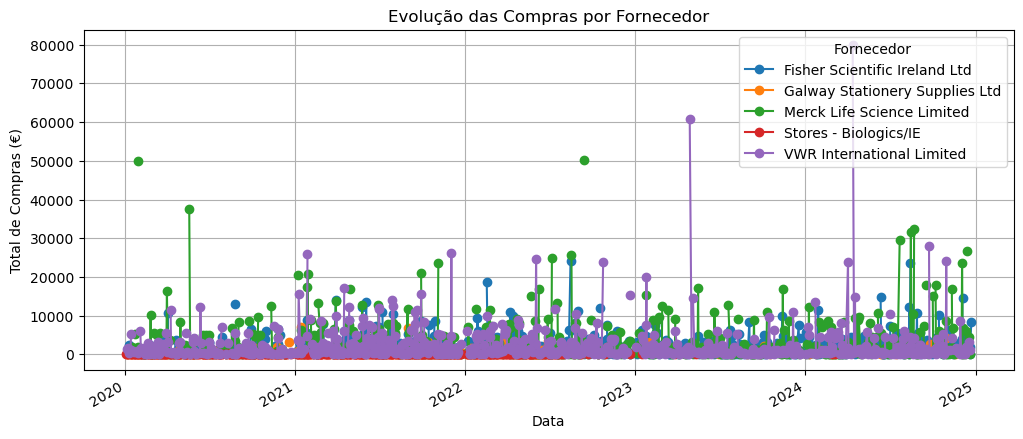

In [278]:
# Top 5 fornecedores com mais pedidos
top_suppliers = df3["Supplier Name"].value_counts().head(5).index

# Filtrar os top fornecedores
df_top_suppliers = df3[df3["Supplier Name"].isin(top_suppliers)]

# Agregar compras por fornecedor e data
df_suppliers_trend = df_top_suppliers.groupby(["Creation Date", "Supplier Name"])["Extended Price"].sum().unstack()

# Criar gráfico de linha para os principais fornecedores
plt.figure(figsize=(15, 8))
df_suppliers_trend.plot(marker="o", linestyle="-", figsize=(12, 5))
plt.xlabel("Data")
plt.ylabel("Total de Compras (€)")
plt.title("Evolução das Compras por Fornecedor")
plt.legend(title="Fornecedor")
plt.grid()
plt.show()


## Tendência nas Categorias de Produtos

<Figure size 1200x500 with 0 Axes>

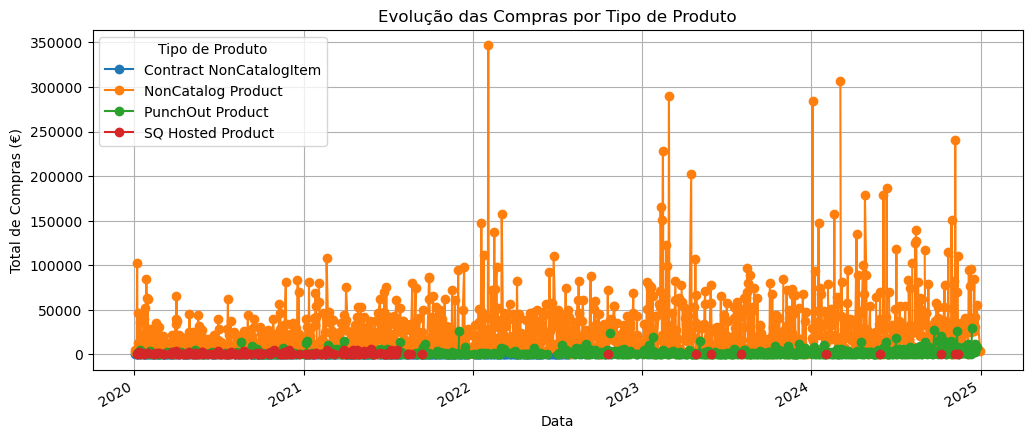

In [281]:
# Top 5 tipos de produtos mais comprados
top_items = df3["Item Type"].value_counts().head(5).index

# Filtrar os top tipos de produtos
df_top_items = df3[df3["Item Type"].isin(top_items)]

# Agregar compras por tipo de produto e data
df_items_trend = df_top_items.groupby(["Creation Date", "Item Type"])["Extended Price"].sum().unstack()

# Criar gráfico de linha para os principais tipos de produtos
plt.figure(figsize=(12, 5))
df_items_trend.plot(marker="o", linestyle="-", figsize=(12, 5))
plt.xlabel("Data")
plt.ylabel("Total de Compras (€)")
plt.title("Evolução das Compras por Tipo de Produto")
plt.legend(title="Tipo de Produto")
plt.grid()
plt.show()


## Analisando a Média de Preços ao Longo do Tempo

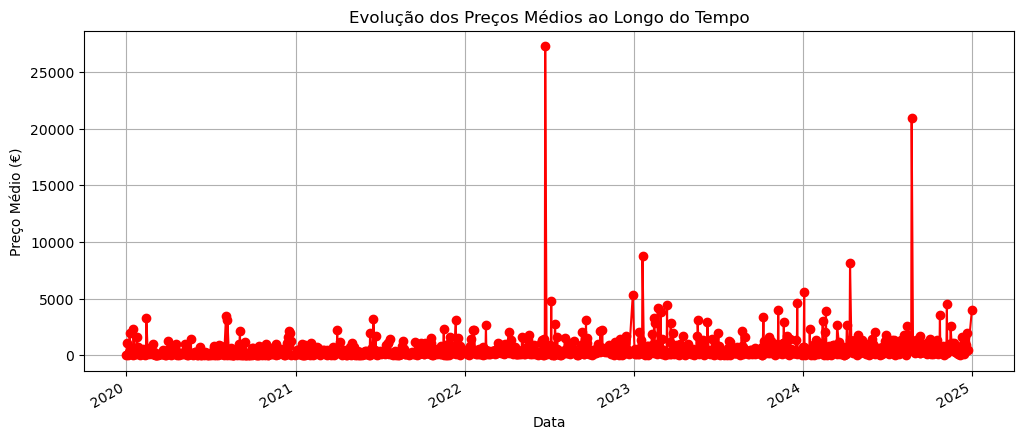

In [284]:
# Calcular a média de preços por data
df_price_trend = df3.groupby("Creation Date")["Unit Price"].mean()

# Criar gráfico da evolução do preço médio dos produtos
plt.figure(figsize=(12, 5))
df_price_trend.plot(color="red", marker="o", linestyle="-")
plt.xlabel("Data")
plt.ylabel("Preço Médio (€)")
plt.title("Evolução dos Preços Médios ao Longo do Tempo")
plt.grid()
plt.show()


## Compradores que Mais Aumentaram seus Pedidos

<Figure size 1200x500 with 0 Axes>

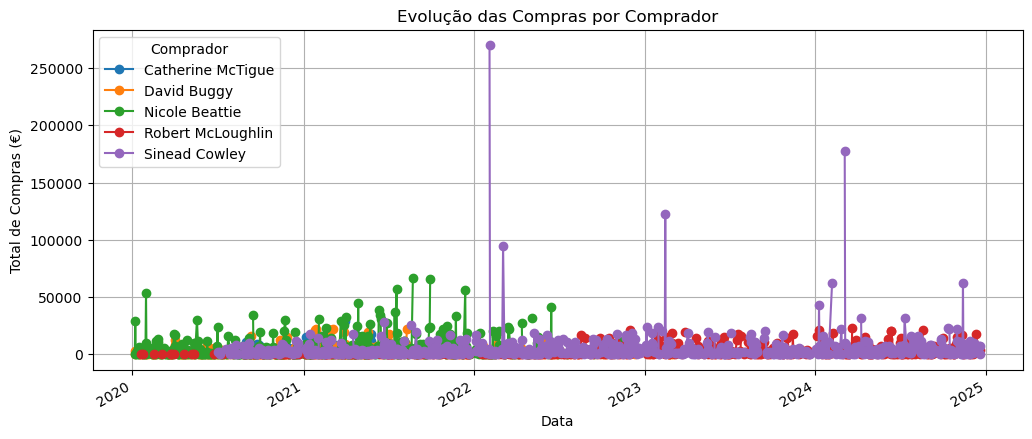

In [287]:
# Criar coluna de nome completo do comprador
df3["Buyer"] = df3["Buyer: First Name"] + " " + df["Buyer: Last Name"]

# Top 5 compradores com mais pedidos
top_buyers = df3["Buyer"].value_counts().head(5).index

# Filtrar os top compradores
df_top_buyers = df3[df3["Buyer"].isin(top_buyers)]

# Agregar compras por comprador e data
df_buyers_trend = df_top_buyers.groupby(["Creation Date", "Buyer"])["Extended Price"].sum().unstack()

# Criar gráfico de tendência para os principais compradores
plt.figure(figsize=(12, 5))
df_buyers_trend.plot(marker="o", linestyle="-", figsize=(12, 5))
plt.xlabel("Data")
plt.ylabel("Total de Compras (€)")
plt.title("Evolução das Compras por Comprador")
plt.legend(title="Comprador")
plt.grid()
plt.show()


## Analisando as Cidades que Mais Realizam Pedidos

<Figure size 1200x500 with 0 Axes>

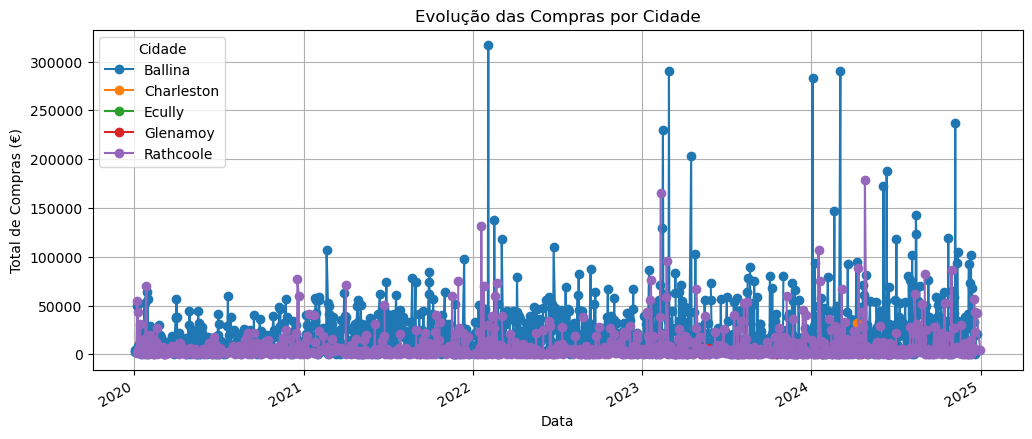

In [290]:
# Top 5 cidades com mais compras
top_cities = df3["ShipTo City"].value_counts().head(5).index

# Filtrar as cidades principais
df_top_cities = df3[df3["ShipTo City"].isin(top_cities)]

# Agregar compras por cidade e data
df_cities_trend = df_top_cities.groupby(["Creation Date", "ShipTo City"])["Extended Price"].sum().unstack()

# Criar gráfico de tendência por cidade
plt.figure(figsize=(12, 5))
df_cities_trend.plot(marker="o", linestyle="-", figsize=(12, 5))
plt.xlabel("Data")
plt.ylabel("Total de Compras (€)")
plt.title("Evolução das Compras por Cidade")
plt.legend(title="Cidade")
plt.grid()
plt.show()


## Análise de Sazonalidade

<Figure size 1200x500 with 0 Axes>

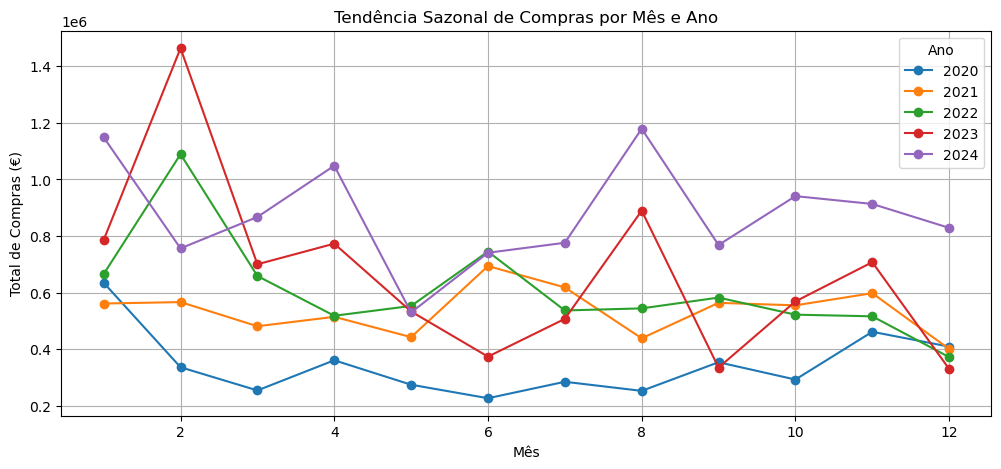

In [297]:


# Converter a coluna de data para o formato datetime
#df3["Creation Date"] = pd.to_datetime(df3["Creation Date"], errors='coerce')

# Criar colunas de ano e mês
df3["Year"] = df3["Creation Date"].dt.year
df3["Month"] = df3["Creation Date"].dt.month

# Remover valores nulos que podem ter sido criados pela conversão
df3 = df3.dropna(subset=["Year", "Month"])

# Agregar compras por mês e ano
df_seasonality = df3.groupby(["Year", "Month"])["Extended Price"].sum().unstack()

# Criar gráfico de sazonalidade
plt.figure(figsize=(12, 5))
df_seasonality.T.plot(marker="o", linestyle="-", figsize=(12, 5))
plt.xlabel("Mês")
plt.ylabel("Total de Compras (€)")
plt.title("Tendência Sazonal de Compras por Mês e Ano")
plt.legend(title="Ano")
plt.grid()
plt.show()



## Insights sobre "Product Description" (Descrição do Produto)
## Insights sobre "Department" (Departamento)

C:\Users\tecap\AppData\Local\Temp\ipykernel_40892\4073188348.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


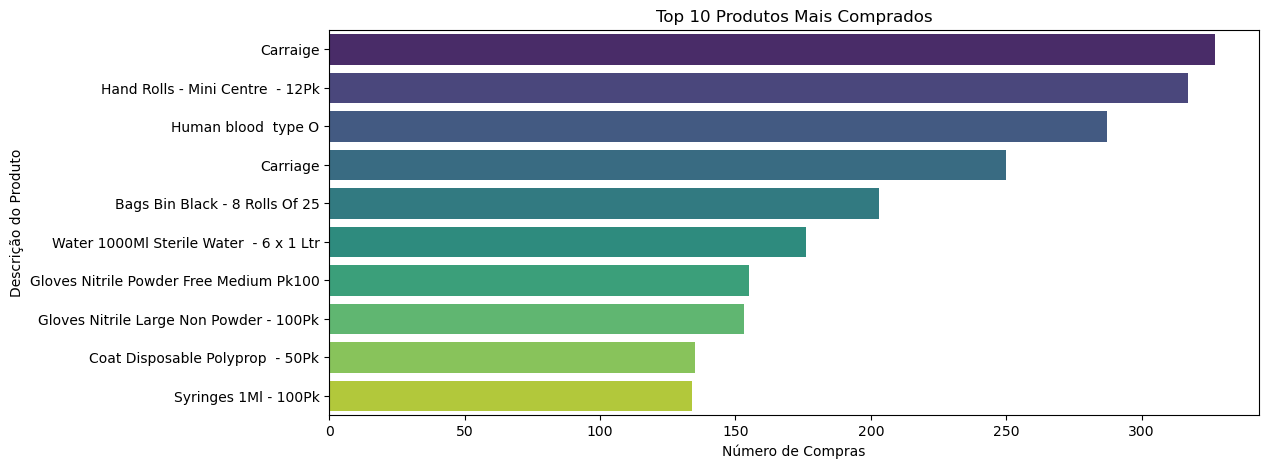

C:\Users\tecap\AppData\Local\Temp\ipykernel_40892\4073188348.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_departments.values, y=top_departments.index, palette="coolwarm")


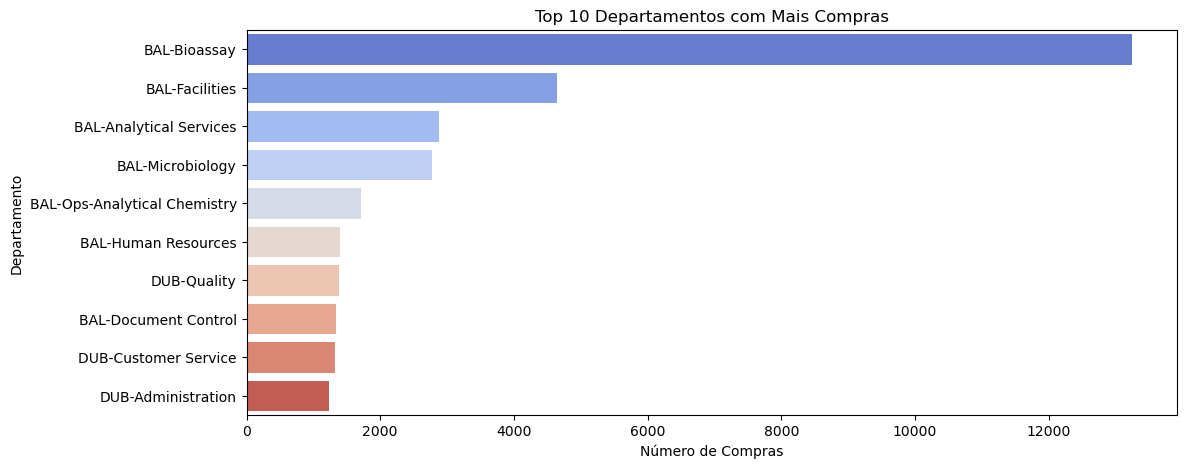

(20367, 28)

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar os valores únicos em Product Description e Department
unique_products = df3["Product Description"].nunique()
unique_departments = df3["Department"].nunique()

# Contagem dos top 10 produtos mais comprados
top_products = df3["Product Description"].value_counts().head(10)

# Contagem dos top 10 departamentos com mais compras
top_departments = df3["Department"].value_counts().head(10)

# Criar gráfico de barras para os produtos mais comprados
plt.figure(figsize=(12, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.xlabel("Número de Compras")
plt.ylabel("Descrição do Produto")
plt.title("Top 10 Produtos Mais Comprados")
plt.show()

# Criar gráfico de barras para os departamentos com mais compras
plt.figure(figsize=(12, 5))
sns.barplot(x=top_departments.values, y=top_departments.index, palette="coolwarm")
plt.xlabel("Número de Compras")
plt.ylabel("Departamento")
plt.title("Top 10 Departamentos com Mais Compras")
plt.show()

# Exibir as estatísticas
unique_products, unique_departments


In [309]:
pip install fbprophet



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached PyMeeus-0.5.12-py3-none-any.whl
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
     --------- ------------------------------ 3.9/16.2 MB 19.6 MB/s eta 0:00:01
     ------------------ --------------------- 7.6/16.2 MB 18.8 MB/s eta 0:00:01
     --------------------------- ----------- 11.5/16.2 MB 19.5 MB/s eta 0:00:01
    

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [305]:
!pip install prophet


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [311]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

# Carregar os dados
file_path = "df_new_3.csv"  # Substitua pelo caminho correto
df3 = pd.read_csv(file_path)

# Converter a coluna de data para datetime
# df3["Creation Date"] = pd.to_datetime(df["Creation Date"], errors='coerce')

# Agregar os gastos por data
df_forecast = df3.groupby("Creation Date")["Extended Price"].sum().reset_index()

# Renomear colunas para o formato esperado pelo Prophet
df_forecast.columns = ["ds", "y"]

# Criar e treinar o modelo Prophet
model = Prophet()
model.fit(df_forecast)

# Criar datas futuras até o final de 2025
future = model.make_future_dataframe(periods=365, freq="D")  # 365 dias para um ano
forecast = model.predict(future)

# Visualizar as previsões
fig = model.plot(forecast)
plt.title("Previsão de Gastos Totais até Dezembro de 2025")
plt.xlabel("Data")
plt.ylabel("Total de Compras (€)")
plt.grid()
plt.show()

# Mostrar os valores previstos para Dezembro de 2025
forecast_2025 = forecast[forecast["ds"] >= "2025-12-01"][["ds", "yhat"]]
print(forecast_2025)


ModuleNotFoundError: No module named 'fbprophet'

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=29661.182, Time=1.13 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=30466.647, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=30134.924, Time=0.21 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=29678.215, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=30464.647, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=29660.394, Time=0.83 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=29659.594, Time=0.33 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=29660.288, Time=0.94 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=29658.594, Time=0.28 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=29659.613, Time=0.75 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=29659.700, Time=0.73 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=29660.484, Time=1.10 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=29661.940, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=29677.682, Time=0.42 sec
 ARIM

C:\Users\tecap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\tecap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\tecap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\tecap\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\tecap\a

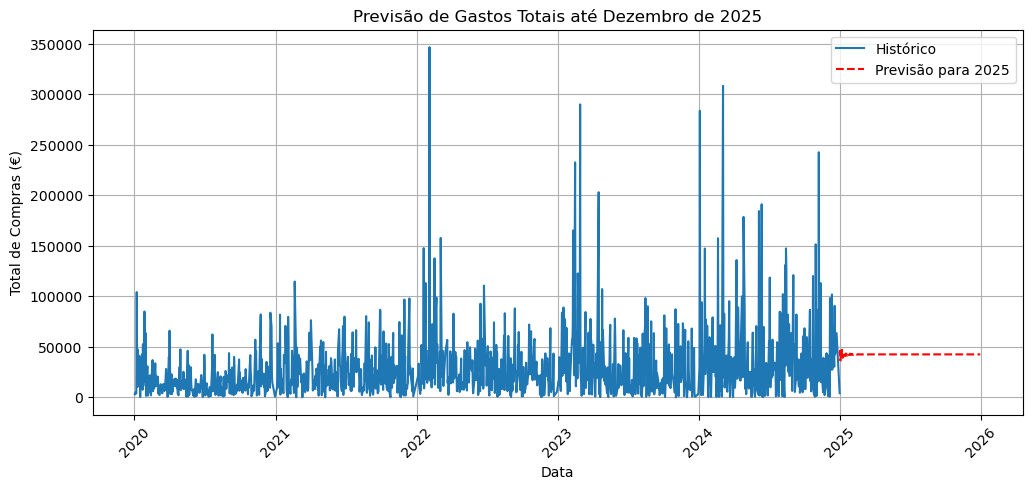

            ds          yhat
335 2025-12-01  42430.034159
336 2025-12-02  42430.034157
337 2025-12-03  42430.034165
338 2025-12-04  42430.034172
339 2025-12-05  42430.034170
340 2025-12-06  42430.034162
341 2025-12-07  42430.034159
342 2025-12-08  42430.034163
343 2025-12-09  42430.034169
344 2025-12-10  42430.034170
345 2025-12-11  42430.034165
346 2025-12-12  42430.034160
347 2025-12-13  42430.034162
348 2025-12-14  42430.034167
349 2025-12-15  42430.034169
350 2025-12-16  42430.034166
351 2025-12-17  42430.034162
352 2025-12-18  42430.034162
353 2025-12-19  42430.034165
354 2025-12-20  42430.034168
355 2025-12-21  42430.034166
356 2025-12-22  42430.034163
357 2025-12-23  42430.034163
358 2025-12-24  42430.034165
359 2025-12-25  42430.034167
360 2025-12-26  42430.034167
361 2025-12-27  42430.034164
362 2025-12-28  42430.034163
363 2025-12-29  42430.034164
364 2025-12-30  42430.034166


In [321]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm  # Auto-ARIMA
from statsmodels.tsa.arima.model import ARIMA



# Converter a coluna de data para datetime
# df3["Creation Date"] = pd.to_datetime(df["Creation Date"], errors='coerce')

# Agregar os gastos por data
df_forecast = df3.groupby("Creation Date")["Extended Price"].sum().reset_index()

# Definir como índice a data e garantir que seja datetime
df_forecast.set_index("Creation Date", inplace=True)
df_forecast.index = pd.to_datetime(df_forecast.index)

# Usar Auto-ARIMA para encontrar os melhores parâmetros
auto_arima_model = pm.auto_arima(df_forecast, seasonal=True, m=12, stepwise=True, trace=True)
best_order = auto_arima_model.order

# Criar e treinar modelo ARIMA com os melhores parâmetros encontrados
model = ARIMA(df_forecast, order=best_order)
model_fit = model.fit()

# Fazer previsão para 365 dias no futuro (até 2025)
future_dates = pd.date_range(start=df_forecast.index[-1], periods=365, freq="D")
forecast_values = model_fit.forecast(steps=365)

# Criar DataFrame com previsões
forecast_df = pd.DataFrame({"ds": future_dates, "yhat": forecast_values.values})

# Plotar os resultados corrigindo o erro
plt.figure(figsize=(12,5))
plt.plot(df_forecast.index, df_forecast["Extended Price"], label="Histórico")
plt.plot(forecast_df["ds"], forecast_df["yhat"], label="Previsão para 2025", linestyle="dashed", color="red")
plt.xlabel("Data")
plt.ylabel("Total de Compras (€)")
plt.legend()
plt.grid()
plt.title("Previsão de Gastos Totais até Dezembro de 2025")
plt.xticks(rotation=45)
plt.show()

# Mostrar os valores previstos para Dezembro de 2025
forecast_df_2025 = forecast_df[forecast_df["ds"] >= "2025-12-01"]
print(forecast_df_2025)


# Time series 

In [324]:
!pip install pmdarima


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [326]:
from datetime import datetime
#registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [330]:
df_time = df3.copy()

In [332]:
df_time.head()

PO ID Creation Date  Supplier ID                   Supplier Name  \
0  165173527    2024-12-31   1002328932  Arena Hospitality t/a Bel Cibo   
1  165108603    2024-12-23     14355761      Molecular Devices (UK) Ltd   
2  165108508    2024-12-23     16031282  Horus Security Consultancy Ltd   
3  165108508    2024-12-23     16031282  Horus Security Consultancy Ltd   
4  165108508    2024-12-23     16031282  Horus Security Consultancy Ltd   

            Item Type Product Description  Quantity  Unit Price  \
0  NonCatalog Product             2025 PO       1.0      4000.0   
1  NonCatalog Product            SMP Care       1.0      4535.0   
2  NonCatalog Product             Quality       2.0       154.0   
3  NonCatalog Product          Analytical       1.0       154.0   
4  NonCatalog Product               Micro       1.0       154.0   

   Extended Price Currency Buyer: First Name Buyer: Last Name  \
0          4000.0      EUR             Sarah            Byrne   
1          4535.0      USD             Brian         Monaghan   
2           308.0      GBP             Karen          McNulty   
3           154.0      GBP             Karen          McNulty   
4           154.0      GBP             Karen          McNulty   

                Department                            ShipTo Contact 1  \
0  DUB-HR & Administration  Charles River Microbial Solutions Intl Ltd   
1                   BAL-IT      Charles River Laboratories Ireland Ltd   
2      BAL-Human Resources      Charles River Laboratories Ireland Ltd   
3      BAL-Human Resources      Charles River Laboratories Ireland Ltd   
4      BAL-Human Resources      Charles River Laboratories Ireland Ltd   

  ShipTo City ShipTo State                                   BillTo Contact 1  \
0   Rathcoole       Dublin  Charles River Microbial Solutions Internationa...   
1     Ballina      CO Mayo             Charles River Laboratories Ireland Ltd   
2     Ballina      CO Mayo             Charles River Laboratories Ireland Ltd   
3     Ballina      CO Mayo             Charles River Laboratories Ireland Ltd   
4     Ballina      CO Mayo             Charles River Laboratories Ireland Ltd   

   Cost Variance  
0         4000.0  
1         4535.0  
2          308.0  
3          154.0  
4          154.0

In [334]:
df_time= df_time.drop(columns=['PO ID', 'Supplier ID', 'Supplier Name','Item Type','Product Description','Quantity','Unit Price','Currency','Buyer: First Name','Buyer: Last Name','Department','ShipTo Contact 1','ShipTo City','ShipTo State','BillTo Contact 1','Cost Variance' ])

In [336]:
df_time.head()

Creation Date  Extended Price
0    2024-12-31          4000.0
1    2024-12-23          4535.0
2    2024-12-23           308.0
3    2024-12-23           154.0
4    2024-12-23           154.0

In [340]:
df_time.set_index('Creation Date', inplace=True)# defenir index

In [342]:
df_time.head()

Extended Price
Creation Date                
2024-12-31             4000.0
2024-12-23             4535.0
2024-12-23              308.0
2024-12-23              154.0
2024-12-23              154.0

In [344]:
df_time.dtypes

Extended Price    float64
dtype: object

In [348]:
time_series = df_time['Extended Price']
time_series

Creation Date
2024-12-31    4000.0
2024-12-23    4535.0
2024-12-23     308.0
2024-12-23     154.0
2024-12-23     154.0
               ...  
2020-01-02     150.0
2020-01-02      50.0
2020-01-02     200.0
2020-01-02      55.0
2020-01-02      73.0
Name: Extended Price, Length: 39679, dtype: float64

In [350]:
time_series[1]

C:\Users\tecap\AppData\Local\Temp\ipykernel_40892\573606877.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  time_series[1]


4535.0

In [354]:
time_series['2024-12']

Creation Date
2024-12-31    4000.00
2024-12-23    4535.00
2024-12-23     308.00
2024-12-23     154.00
2024-12-23     154.00
               ...   
2024-12-02     154.00
2024-12-02    1084.56
2024-12-01     452.00
2024-12-01     345.74
2024-12-01     351.12
Name: Extended Price, Length: 462, dtype: float64

In [356]:
time_series.index.max()

Timestamp('2024-12-31 00:00:00')

In [358]:
time_series.index.min()

Timestamp('2020-01-02 00:00:00')

In [388]:
# Garantir que o índice é datetime e ordená-lo
time_series = time_series.sort_index()

# Agora, podemos fazer o slice corretamente
filtered_series = time_series.loc['2020-01-02':'2024-12-31']

# Exibir os primeiros valores da série filtrada
print(filtered_series.head())


Creation Date
2020-01-02      73.0
2020-01-02    1800.0
2020-01-02     200.0
2020-01-02     350.0
2020-01-02      55.0
Name: Extended Price, dtype: float64


In [390]:
time_series['2020-01-02':'2024-12-31']

Creation Date
2020-01-02       73.00
2020-01-02     1800.00
2020-01-02      200.00
2020-01-02      350.00
2020-01-02       55.00
                ...   
2024-12-23    21244.94
2024-12-23    21244.94
2024-12-23      234.00
2024-12-23      896.00
2024-12-31     4000.00
Name: Extended Price, Length: 39679, dtype: float64

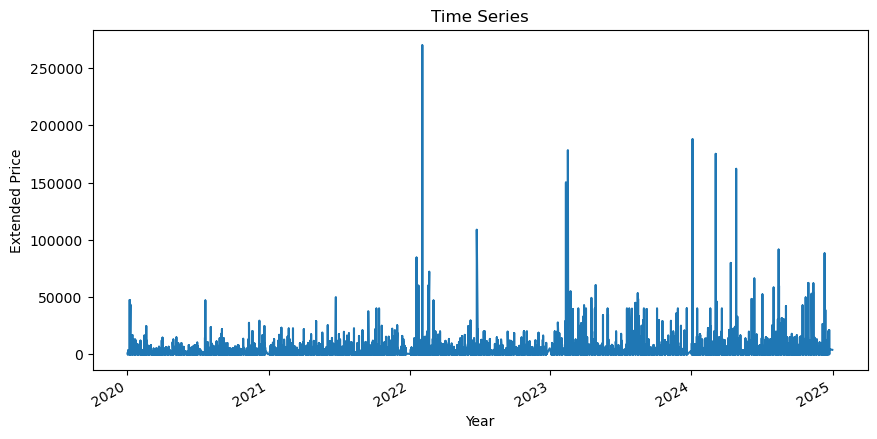

In [392]:
df_time['Extended Price'].plot(title='Time Series', figsize=(10, 5))
plt.xlabel('Year')
plt.ylabel('Extended Price')
plt.show()

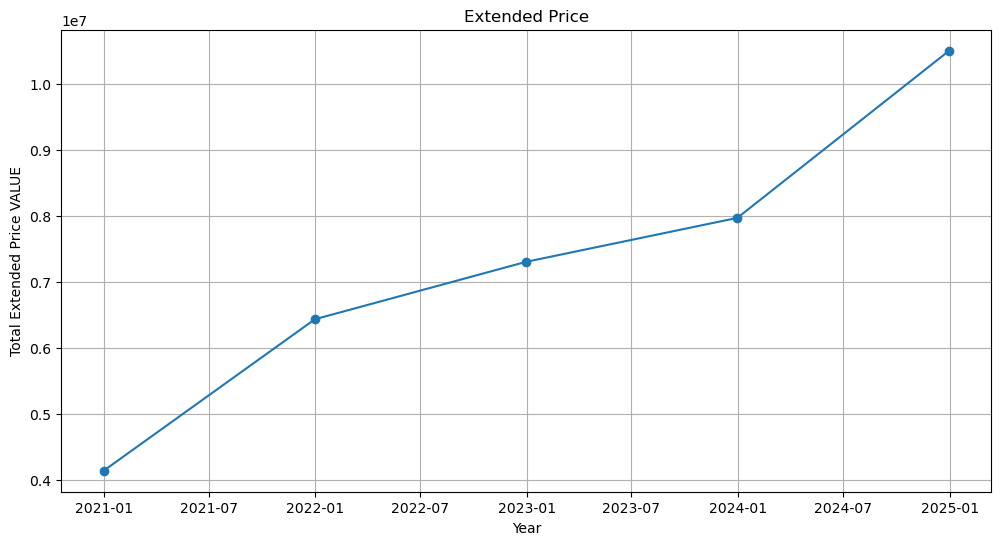

Creation Date
2020-12-31     4139839.27
2021-12-31     6433173.13
2022-12-31     7302586.31
2023-12-31     7967575.04
2024-12-31    10498570.24
Freq: YE-DEC, Name: Extended Price, dtype: float64

In [394]:
# Resample the time series to annual frequency and sum the values
time_series_year = df_time['Extended Price'].resample('YE').sum()

# Plot the annual resampled time series
plt.figure(figsize=(12, 6))
plt.plot(time_series_year, marker='o')
plt.title('Extended Price')
plt.xlabel('Year')
plt.ylabel('Total Extended Price VALUE')
plt.grid()
plt.show()

time_series_year

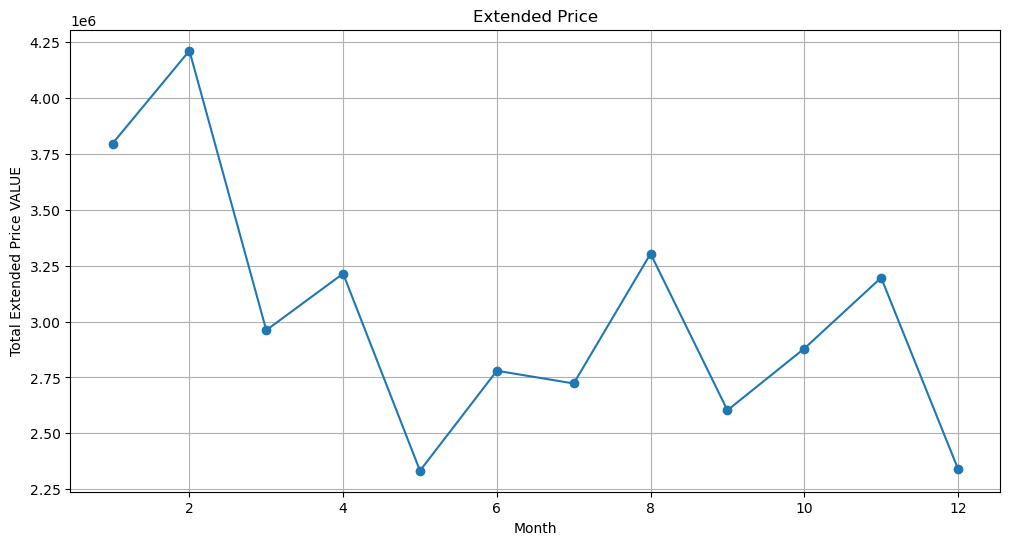

Creation Date
1     3796765.35
2     4212067.71
3     2961167.02
4     3214582.41
5     2332318.31
6     2779736.86
7     2722830.00
8     3303718.97
9     2602762.13
10    2879112.07
11    3196207.13
12    2340476.03
Name: Extended Price, dtype: float64

In [396]:
# Resample the time series to monthly frequency and sum the values
time_series_month = time_series.groupby([lambda x: x.month]).sum()

# Plot the monthly resampled time series
plt.figure(figsize=(12, 6))
plt.plot(time_series_month, marker='o')
plt.title('Extended Price')
plt.xlabel('Month')
plt.ylabel('Total Extended Price VALUE')
plt.grid()
plt.show()

time_series_month

In [398]:
# Attempting to filter and visualize the time series between specific dates
try:
    ts_datas = df_time['Extended Price']['2020-01-02':'2024-12-31']
    plt.figure(figsize=(12, 6))
    plt.plot(ts_datas, marker='o')
    plt.title('Extended Price Between 2020-01-01 to 2024-12-31')
    plt.xlabel('Date')
    plt.ylabel('Extended Price VALUE')
    plt.grid()
    plt.show()

# error handling
except KeyError:
    "df not found."

## Decomposition
- decomposicao = seasonal_decompose(time_series)
- 
tendencia = decomposicao.trend- 
sazonal = decomposicao.seasona- l
aleatorio = decomposicao.resid

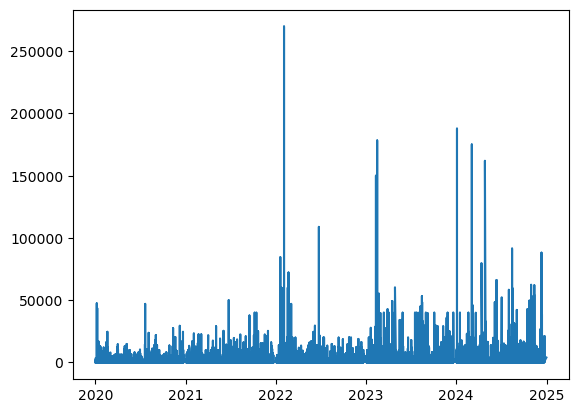

In [401]:
# Visualização da série temporal
plt.plot(time_series)

C:\Users\tecap\AppData\Local\Temp\ipykernel_40892\3867958036.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_time["Extended Price"].fillna(method="ffill", inplace=True)  # Forward fill
C:\Users\tecap\AppData\Local\Temp\ipykernel_40892\3867958036.py:27: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_time["Extended Price"].fillna(method="ffill", inplace=True)  # Forward fill


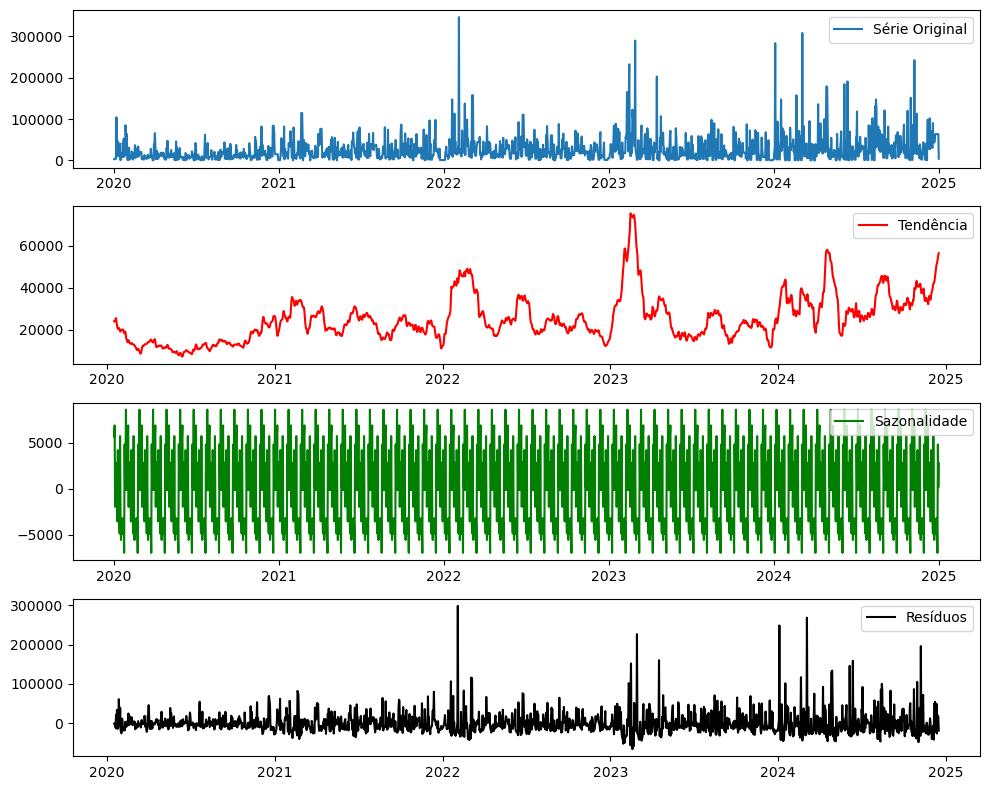

In [409]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Carregar os dados
file_path = "df_new_3.csv"  # Substitua pelo caminho correto
df = pd.read_csv(file_path)

# Converter a coluna de data para datetime e ordenar
df["Creation Date"] = pd.to_datetime(df["Creation Date"], errors='coerce')
df = df.sort_values(by="Creation Date")  # Ordenar para garantir sequência

# Agregar os gastos por data (somando os valores caso haja duplicatas)
df_time = df.groupby("Creation Date")["Extended Price"].sum().reset_index()

# Definir como índice a data e garantir que seja datetime
df_time.set_index("Creation Date", inplace=True)
df_time.index = pd.to_datetime(df_time.index)

# Verificar e remover datas duplicadas
df_time = df_time[~df_time.index.duplicated(keep="first")]

# Definir frequência diária (agora que não há duplicatas)
df_time = df_time.asfreq("D")  # Frequência diária

# Preencher valores ausentes (caso alguns dias não tenham compras)
df_time["Extended Price"].fillna(method="ffill", inplace=True)  # Forward fill

# Decomposição da série temporal com período mensal (30 dias)
decomposicao = seasonal_decompose(df_time["Extended Price"], model="additive", period=30)

# Criar os gráficos da decomposição
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(decomposicao.observed, label="Série Original")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposicao.trend, label="Tendência", color="red")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposicao.seasonal, label="Sazonalidade", color="green")
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposicao.resid, label="Resíduos", color="black")
plt.legend()

plt.tight_layout()
plt.show()


## Arima 

In [416]:
stepwise_model = auto_arima(df_time, start_p=1,start_q=1,start_d= 0, start_P=0, max_p=3, max_q=3, m=12, seasonal=True, trace=True, stepwise=False)

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=43551.334, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=43544.342, Time=0.23 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=43542.987, Time=0.67 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=43545.088, Time=0.14 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=43541.307, Time=0.67 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=43542.772, Time=2.03 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=43544.377, Time=0.54 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=43542.614, Time=2.04 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=43544.327, Time=3.46 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=42852.211, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=42850.735, Time=0.56 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=42831.902, Time=1.66 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=42851.547, Time=0.38 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=42842.699, Time=1.26 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=42833

In [418]:
print(stepwise_model.aic())

42735.81760676984


In [422]:
stepwise_model2 = auto_arima(df_time, start_p=1,start_q=1,start_d= 0, start_P=0, max_p=3, max_q=3, m=12, seasonal=True, trace=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=42772.789, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=43551.334, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=43221.619, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=42850.735, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=43549.334, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=42771.476, Time=0.50 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=42771.945, Time=1.18 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=42767.054, Time=2.91 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=42765.383, Time=3.86 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=42764.835, Time=2.23 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=42831.924, Time=1.31 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=43215.874, Time=0.99 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=42762.592, Time=3.34 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=42770.374, Time=0.99 sec
 ARIM

In [424]:
print(stepwise_model2.aic())

42718.20811162509


In [450]:
# Dividir 70% Treino e 30% Teste com base no tempo
train = df_time.loc['2020-01-01':'2023-06-30']  # 70% dos dados
test = df_time.loc['2024-01-01']   # 30% dos dados

Período dos dados: 2020-01-02 00:00:00 a 2024-12-31 00:00:00
Tamanho Treino: 1276 registros
Tamanho Teste: 550 registros
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=29516.409, Time=1.59 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=30032.401, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=29793.897, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=29604.982, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=30030.402, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=29517.452, Time=1.17 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=29518.022, Time=1.19 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=29515.598, Time=4.78 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=29514.925, Time=3.61 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=29519.531, Time=2.51 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=29524.458, Time=2.07 sec
 ARIMA(3,1,2)(2,0,0)[12] intercept   : AIC=29516.642, Time=2.28 sec
 ARIMA(2,1,3)(2,0,0)

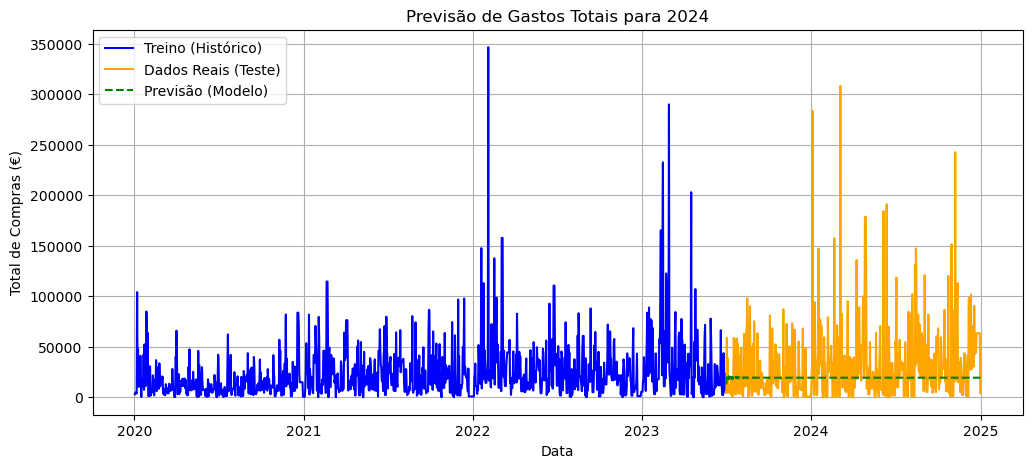

               Extended Price      Forecast
Creation Date                              
2023-07-01            4811.00  13967.794806
2023-07-02            4811.00  13524.961701
2023-07-03           58820.07  19628.845789
2023-07-04            4512.54  17843.004592
2023-07-05           38628.61  19927.717150
...                       ...           ...
2024-12-27           63459.60  19335.121803
2024-12-28           63459.60  19335.121803
2024-12-29           63459.60  19335.121803
2024-12-30           63459.60  19335.121803
2024-12-31            4000.00  19335.121803

[550 rows x 2 columns]


In [464]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Garantir que 'Creation Date' está no formato datetime e seja o índice
df_time.index = pd.to_datetime(df_time.index)
df_time = df_time.sort_index()  # Ordenar para evitar problemas

# Garantir que os dados começam de 2020
print(f"Período dos dados: {df_time.index.min()} a {df_time.index.max()}")

# Dividir 70% Treino e 30% Teste com base no tempo
train = df_time.loc['2020-01-01':'2023-06-30']  # 70% dos dados
test = df_time.loc['2023-07-01':'2024-12-31']   # 30% dos dados

# Exibir tamanhos das divisões
print(f"Tamanho Treino: {len(train)} registros")
print(f"Tamanho Teste: {len(test)} registros")

# Ajustar o modelo Auto-ARIMA para encontrar os melhores parâmetros
stepwise_model2 = auto_arima(train, seasonal=True, m=12, stepwise=True, trace=True)

# Gerar previsões para o período de teste
future_forecast = stepwise_model2.predict(n_periods=len(test))

# Criar um DataFrame para armazenar as previsões
future_forecast = pd.DataFrame(future_forecast, index=test.index, columns=["Forecast"])

# Plotar os resultados
plt.figure(figsize=(12, 5))
plt.plot(train, label="Treino (Histórico)", color="blue")
plt.plot(test, label="Dados Reais (Teste)", color="orange")
plt.plot(future_forecast, label="Previsão (Modelo)", linestyle="dashed", color="green")
plt.xlabel("Data")
plt.ylabel("Total de Compras (€)")
plt.legend()
plt.grid()
plt.title("Previsão de Gastos Totais para 2024")
plt.show()

# Concatenar os resultados e exibir os valores previstos
resultado = pd.concat([test, future_forecast], axis=1)
print(resultado)


Período dos dados: 2020-01-02 00:00:00 a 2024-12-31 00:00:00
Tamanho Treino: 1460 registros
Tamanho Teste: 366 registros
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=33735.437, Time=1.81 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=34337.159, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=34065.752, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=33830.385, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=34335.160, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=33735.352, Time=1.14 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=33738.099, Time=0.41 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=33730.650, Time=3.55 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=33732.633, Time=6.03 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=33738.394, Time=2.87 sec
 ARIMA(2,1,1)(0,0,2)[12] intercept   : AIC=33743.248, Time=2.42 sec
 ARIMA(3,1,2)(0,0,2)[12] intercept   : AIC=33730.719, Time=6.25 sec
 ARIMA(2,1,3)(0,0,2)

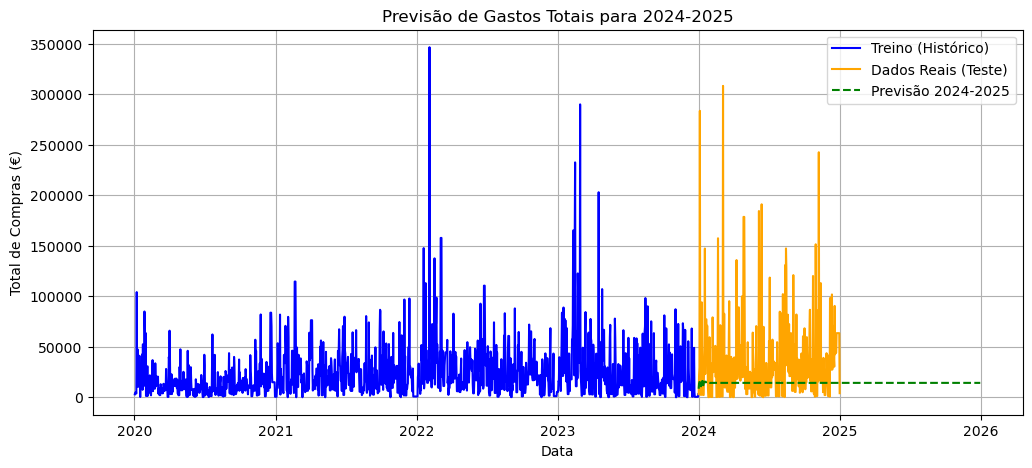

               Forecast
2025-01-01  14203.69576
2025-01-02  14203.69576
2025-01-03  14203.69576
2025-01-04  14203.69576
2025-01-05  14203.69576
...                 ...
2025-12-26  14203.69576
2025-12-27  14203.69576
2025-12-28  14203.69576
2025-12-29  14203.69576
2025-12-30  14203.69576

[364 rows x 1 columns]


In [476]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Garantir que 'Creation Date' está no formato datetime e seja o índice
df_time.index = pd.to_datetime(df_time.index)
df_time = df_time.sort_index()  # Ordenar para evitar problemas

# Garantir que os dados começam de 2020
print(f"Período dos dados: {df_time.index.min()} a {df_time.index.max()}")

# Dividir 70% Treino e 30% Teste com base no tempo
train = df_time.loc['2020-01-01':'2023-12-31']  # Agora inclui todo 2023
test = df_time.loc['2024-01-01':'2024-12-31']   # Teste para validar previsões

# Exibir tamanhos das divisões
print(f"Tamanho Treino: {len(train)} registros")
print(f"Tamanho Teste: {len(test)} registros")

# Ajustar o modelo Auto-ARIMA para encontrar os melhores parâmetros
stepwise_model2 = auto_arima(train, seasonal=True, m=12, stepwise=True, trace=True)

# Fazer previsões para 2024 e 2025
future_periods = 730  # 365 dias de 2024 + 365 dias de 2025
future_dates = pd.date_range(start="2024-01-01", periods=future_periods, freq="D")
future_forecast = stepwise_model2.predict(n_periods=future_periods)

# Criar um DataFrame para armazenar as previsões
future_forecast_df = pd.DataFrame(future_forecast, index=future_dates, columns=["Forecast"])

# Plotar os resultados
plt.figure(figsize=(12, 5))
plt.plot(train, label="Treino (Histórico)", color="blue")
plt.plot(test, label="Dados Reais (Teste)", color="orange")
plt.plot(future_forecast_df, label="Previsão 2024-2025", linestyle="dashed", color="green")
plt.xlabel("Data")
plt.ylabel("Total de Compras (€)")
plt.legend()
plt.grid()
plt.title("Previsão de Gastos Totais para 2024-2025")
plt.show()

# Exibir os valores previstos para 2025
future_forecast_2025 = future_forecast_df.loc["2025-01-01":"2025-12-31"]
print(future_forecast_2025)
